<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:250%;">
        Predicting taxonomic identity and genetic composition based on codon usage bias levels
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <font color="#728FA5" size = "4">
        <b>Machine Learning Homework</b> </font 
        <br> <br> <br> <br>
        <font face=”Arial,Helvetica,sans-serif” size = "3"> <b>Eleonora Cianini</b> </font <br>
        <br>
    <a></a>
    </div>
    </td>
    <td width="150px"> 
        <a>
         <img align="right", width="150px" height ="150px"
 src="https://upload.wikimedia.org/wikipedia/it/b/be/Logo_Politecnico_Milano.png" alt="Logo Politecnico di Milano"/>
        </a>
    </td>
</tr>
                                                                                      
</table>
                                                                                       


<p>
<b> Introduction</b>
<ol>
    <il><b> 1. Exploratory Data Analysis </b></il><br>
    <ol>
        <il> 1.1 Data overview</il><br>
        <il> 1.2 Exploratory Data Analysis on Kingdom</il><br>
        <il> 1.3 Clustering on Kingdom</il><br>
    </ol>
    <il><b> 2. Classification </b></il><br>
    <ol> 
        <il> 2.1 Logistic regression </il><br>
    </ol>
    <il><b> 3. Regression </b></il><br>
    <ol> 
        <il> 3.1 Linear Regression</il><br>
        <il> 3.2 Feature Selection </il><br>
    </ol>
    <b><b> Conclusions </b><br>
        

<h1> Introduction </h1> <br>

<h3> Background </h3>
<p>The coding DNA of a genome describes the proteins of the organism in terms of 64 different codons that map to 21 different amino acids and a stop signal.<br>
Different organisms differ not only in the amino acid sequences of their proteins, but also in the extents in which they use the synonymous codons for different amino acids.<br>
The inherent redundancy of the genetic code allows the same amino acid to be specified by one to five different codons. For this reason there are, in principle, many different nucleic acids that describe the primary structure of a given protein.<br>
Coding DNA sequences thus can carry information beyond that needed for encoding amino acid sequence.<br>
Thus, one may ask: <b>is it possible to classify some properties of nucleic acids from the usages of different synonymous codons rather than, with much greater computational effort, from individual nucleotide sequences themselves?</b><br>

This data set enables a preliminary analysis on this topic.</p>







<h1> 1. Exploratory Data Analysis </h1>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sklearn as sk
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import mutual_info_classif
np.random.seed(0)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import statsmodels.stats.multitest as multi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

<h2> 1.1 Data Overview </h2>

<p>
    The dataset is already split in <code> train </code>and<code> test </code> data and we import them as Pandas dataframes.

In [2]:
#Read the data and create a pandas dataframe
pd_train = pd.read_csv("train.csv")
pd_test = pd.read_csv ("test.csv")

<p> 
    In the EDA we will focus only on <code> train </code> dataset

In [3]:
# Let's look at the shape
nRow, nCol = pd_train.shape
print(f"There are {nRow} rows and {nCol} columns in the train dataset")

There are 10422 rows and 70 columns in the train dataset


In [4]:
#Check for missing values/data
_ = np.any(pd_train.isna(), axis=1).sum()

print(f"There are {_} null values in the train dataset")

There are 0 null values in the train dataset


In [5]:
#First look at the dataset structure
pd_train.head(10)

Unnamed: 0 Kingdom  DNAtype  SpeciesID  Ncodons  \
0         872     vrl        0     207343     6686   
1        9865     inv        0       7629    10060   
2        3190     bct        0     320850    14031   
3        3674     bct        0       1397    39839   
4       11372     vrt        1      50790     5112   
5        1999     vrl        0      36395     3810   
6         729     vrl        0     173921     1098   
7         903     vrl        0     218387     2241   
8        2815     vrl        0      93830     5284   
9         609     vrl        0     150846     2194   

                                  SpeciesName      UUU      UUC      UUA  \
0                          Bovine foamy virus  0.01541  0.00927  0.01720   
1                    Anthocidaris crassispina  0.01213  0.02515  0.00268   
2                     Staphylococcus phage X2  0.02580  0.01618  0.03606   
3                          Bacillus circulans  0.00128  0.02141  0.01225   
4        mitochondrion Dascyllus trimaculatus  0.03169  0.01780  0.03893   
5          Sweet potato feathery mottle virus  0.02152  0.01312  0.01785   
6  Human calicivirus NLV/Oberhausen 455/01/DE  0.01639  0.02186  0.01457   
7                Kalanchoe top-spotting virus  0.00982  0.01963  0.00982   
8                              Hantavirus Z10  0.00549  0.01438  0.02290   
9                 Enterovirus 5865/sin/000009  0.02142  0.01732  0.01048   

       UUG  ...      CGG      AGA      AGG      GAU      GAC      GAA  \
0  0.01825  ...  0.00643  0.02064  0.01182  0.02812  0.00838  0.03365   
1  0.01352  ...  0.00268  0.00915  0.01412  0.03280  0.02555  0.03708   
2  0.01354  ...  0.00114  0.01775  0.00499  0.03756  0.02523  0.05388   
3  0.01649  ...  0.01177  0.00705  0.00422  0.03316  0.02229  0.03444   
4  0.00000  ...  0.00000  0.00000  0.00000  0.00020  0.01389  0.02465   
5  0.01890  ...  0.00367  0.01627  0.01339  0.03675  0.01890  0.03675   
6  0.01457  ...  0.00182  0.01821  0.01821  0.02914  0.02914  0.02186   
7  0.00848  ...  0.00848  0.01473  0.01562  0.02544  0.02053  0.05578   
8  0.01533  ...  0.00530  0.01665  0.01344  0.03634  0.00757  0.03066   
9  0.01595  ...  0.00365  0.01322  0.01322  0.02598  0.01595  0.02279   

       GAG      UAA      UAG      UGA  
0  0.01974  0.01511  0.00030  0.00030  
1  0.05398  0.03330  0.00030  0.00050  
2  0.01946  0.02245  0.00121  0.00086  
3  0.02370  0.00831  0.00028  0.00063  
4  0.00352  0.00352  0.00000  0.02465  
5  0.03097  0.01680  0.00052  0.00000  
6  0.01821  0.01275  0.00000  0.00000  
7  0.03659  0.01473  0.00000  0.00089  
8  0.02763  0.00076  0.00019  0.00000  
9  0.02735  0.02461  0.00000  0.00000  

[10 rows x 70 columns]

<p> From <code>pd_train.head</code>we can see that some features are not relevant for our future analysis, so we drop them from initial datasets and we create more useful dataframes : </p>

In [6]:
train = pd_train.drop(["Unnamed: 0", "SpeciesID", "Ncodons", "SpeciesName"], axis=1)
test = pd_test.drop(["Unnamed: 0","SpeciesID", "Ncodons", "SpeciesName"], axis=1)
#now we have a train/test dataset with only the target features

<h3> Visual inspection using correlation matrix </h3>

<p> The number of features is too high to try to visualize them using a pairplot.<br>
    We can instead plot the <b>correlation matrix</b> of the codon frequencies to see if there is any kind of correlation.
</p>

In [7]:
#columns that are clinical information
non_codons = train.columns[0:2]

#create a new dataframe for codon frequencies only
codons = train.drop(non_codons, axis = 1)

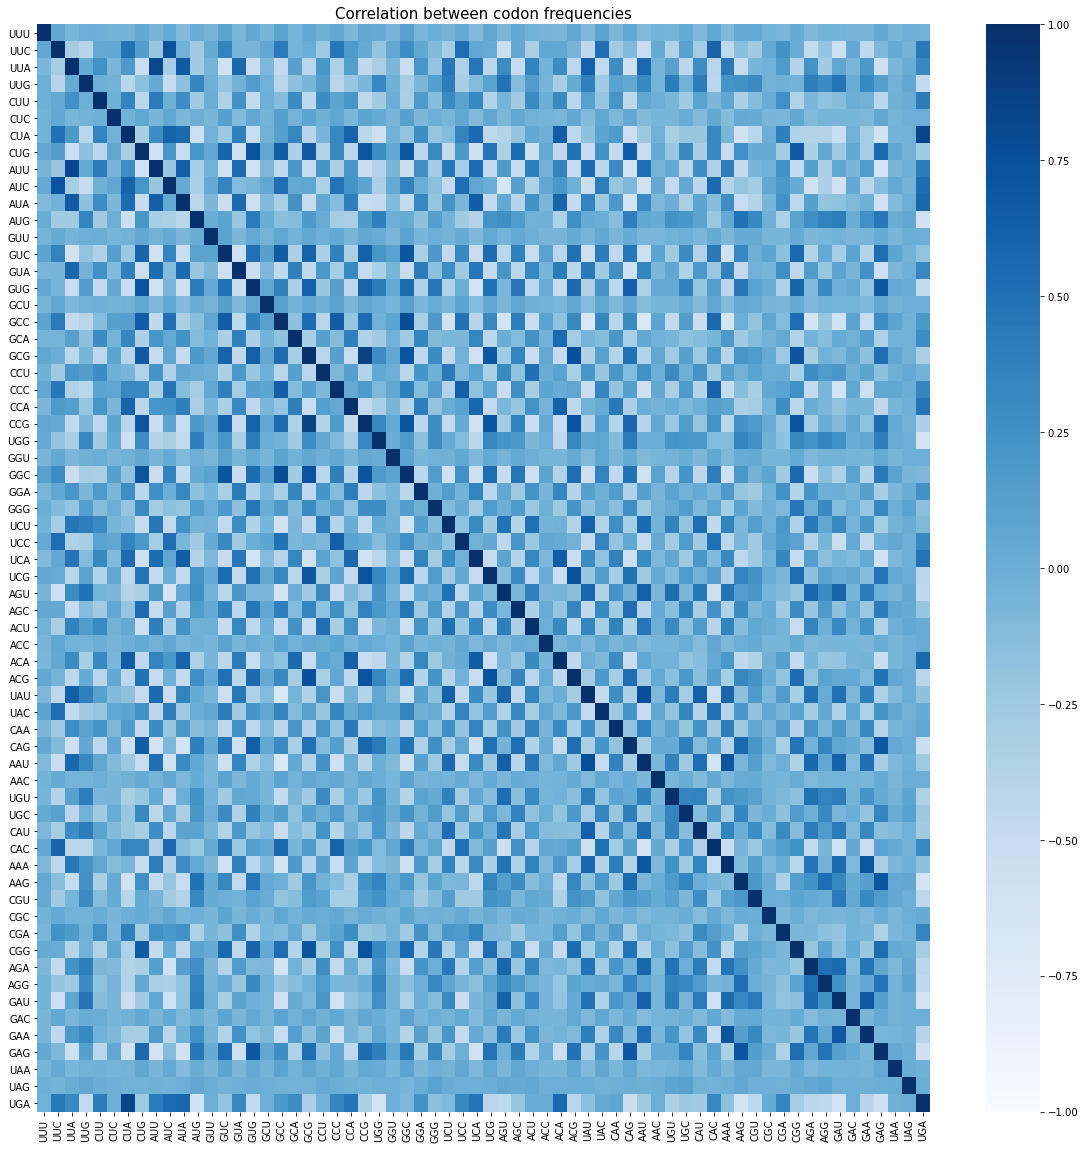

In [8]:
#check for the correlation between attributes
corr = codons.corr()

plt.figure(figsize=(20, 20))
fig1= sns.heatmap(corr,vmin = -1, vmax = 1, center= 0, cmap = "Blues") #create seaborn heatmap
plt.title('Correlation between codon frequencies', fontsize = 15) #title
plt.show()

From the heatmap we can see that there are some <b> positive correlated features</b>: 
<ul>
    <li> CUA - UGA </li>
    <li> GAU - AGA </li>
    <li> AGG - AGA </li>
    <li> CGC - UUU </li>
Let's inspect them more in detail:

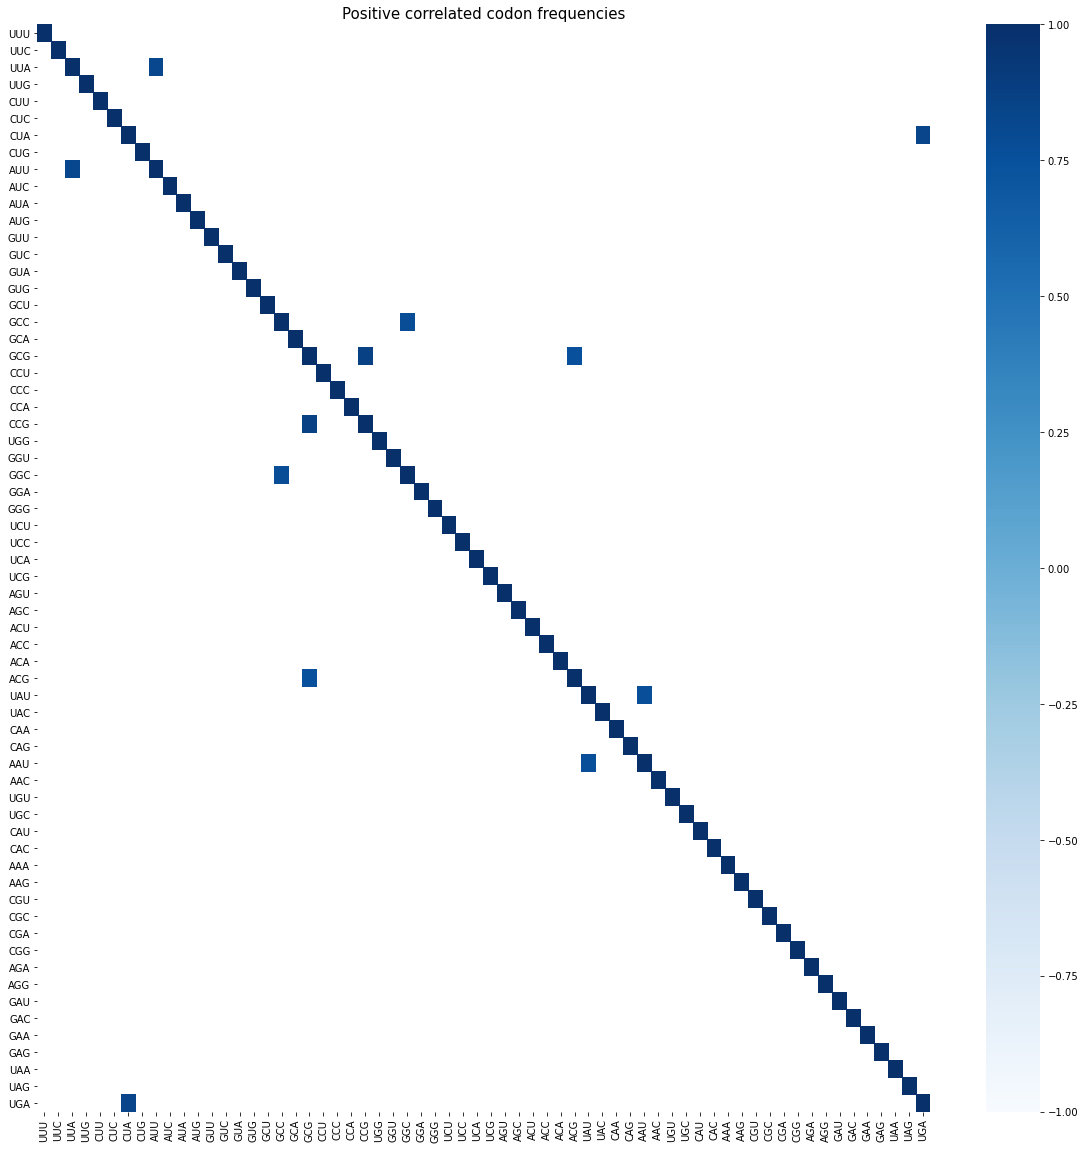

There 5 most correlated codon frequencies are
CCG  GCG    0.868349
UGA  CUA    0.840933
UUA  AUU    0.823284
GCC  GGC    0.773765
UAU  AAU    0.767832
dtype: float64


In [9]:
#apply a filter to get highest positive correlated features
high_corr = corr[corr>=.75] 

#plot the correlation using an heatmap
plt.figure(figsize=(20,20))
fig2= sns.heatmap(high_corr,vmin = -1, vmax = 1, center= 0, cmap = "Blues") #create seaborn heatmap
plt.title('Positive correlated codon frequencies', fontsize = 15) #title
plt.show()

#we don't want to see each self correlation on our list so we set them equal to zero 
high_corr[high_corr == 1] = 0

#get the list the most correlated codon frequencies
mosthc = high_corr.unstack().sort_values(ascending = False).drop_duplicates()
print(f"There 5 most correlated codon frequencies are")
print(mosthc.head(5))

<p> These are generic results that examine ALL the dataframe codon frequencies.<br>
    Now we reduce the analysis on the basis of the:
<ul>
    <li> <b>Kingdom</b> classes </li>
</ul>
 </p>

<h2> 1.2 Exploratory data analysis on Kingdom </h2>

<p> From the documentation we know that the attribute <code>Kingdom</code> contains <b>11 classes </b>: <br> 

<ul>
    <li> ’arc’ (archaea), </li>
    <li> ’bct’ (bacteria), </li>
    <li> ’phg’ (bacteriophage), </li>
    <li> ’plm’ (plasmid),</li>
    <li> ’pln’ (plant),</li>
    <li> ’inv’(invertebrate),</li>
    <li> ’vrt’ (vertebrate),</li>
    <li> ’mam’ (mammal),</li>
    <li> ’rod’ (rodent),</li>
    <li> ’pri’ (primate),</li>
    <li> ’vrl’ (virus)</li>
</ul>

In the paper <i>"Codon usage bias levels predict taxonomic identity and genetic composition"</i> the authors deleted the 'plm' class and re-assembled the other classes reducing the number from 11 to 5. <br>
We decide to not follow this approach and maintain all the eleven classes without any deletion. <br>
To better visualize the results coming from the application of different machine learning algorithm, instead of re-group the labels, we <b>reduced the number of samples</b>.

<h3> Data Overview and Visualization </h3>

In [10]:
#create a new dataframe containing only the kingdom classes and the codon frequencies
kingdom_train = train.drop(["DNAtype"], axis = 1)

<p> We want to <b>check the distribution of the samples</b> within the classes.<br>

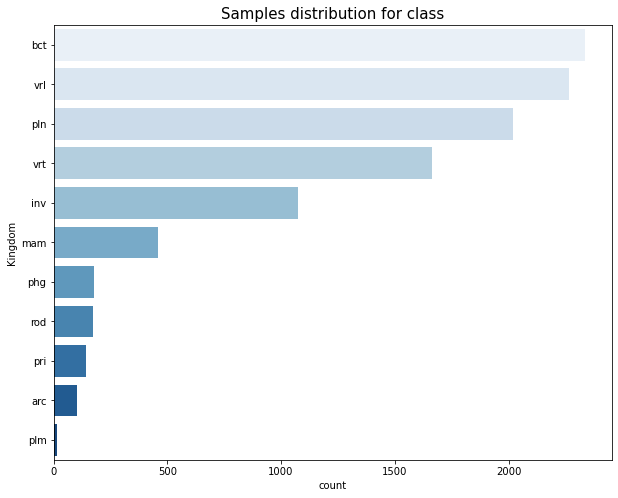

Kingdom  Counts
1      bct    2336
9      vrl    2265
6      pln    2018
10     vrt    1662
2      inv    1076
3      mam     458
4      phg     176
8      rod     172
7      pri     144
0      arc     101
5      plm      14

In [11]:
#visualize the distribution of the samples in each class
plt.figure(figsize=(10, 8))
fig3 = sns.countplot(data = kingdom_train, y = "Kingdom",
                     order = kingdom_train['Kingdom'].value_counts().index, palette = "Blues")
plt.title('Samples distribution for class', fontsize = 15) #title
plt.show()

#count the number of samples for each class
kingdom_train.groupby("Kingdom").size().reset_index(name='Counts').sort_values(by="Counts", ascending =False)


<p> Both from the graph and the count, we can see that <b>classes</b> are <b>NOT balanced</b>, especially the "plm" which contains only 14 samples.<br> </p>

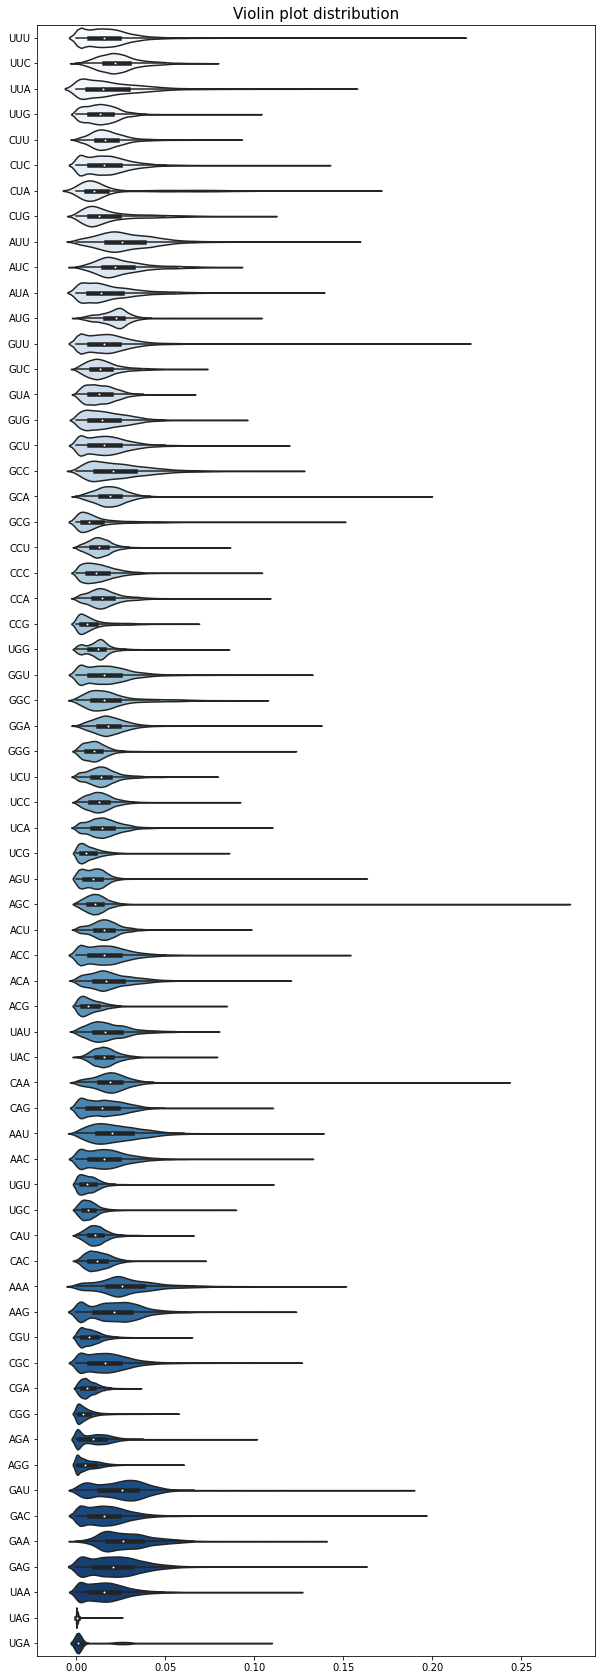

In [12]:
#inspect the distribution using a violin plot
plt.figure(figsize=(10, 30))
fig4_1 = sns.violinplot(data=kingdom_train, orient ="h", scale = "count",  palette="Blues")
plt.title("Violin plot distribution", fontsize = 15)
plt.show()

<p> From the violin plot it is possible to see that almost all the samples present <b>outliers</b> while the median is always between 0.00 and 0.05.

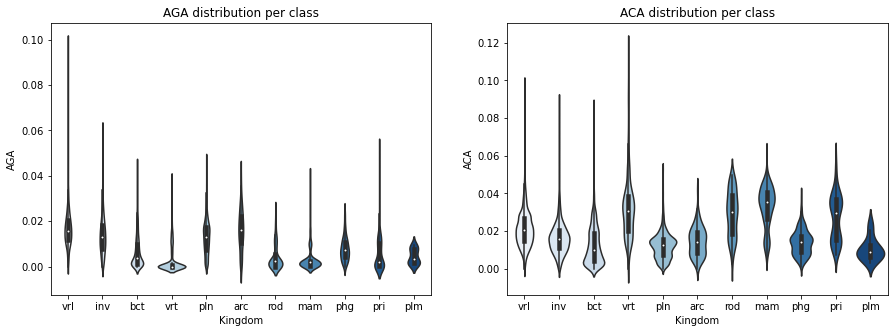

In [13]:
#let's focus on "AGA" and "ACA" because are the codon frequencies missing in the test dataset

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

figure4_2 = sns.violinplot(x="Kingdom", y="AGA", ax = ax1, data=kingdom_train, palette="Blues")
ax1.title.set_text('AGA distribution per class')

figure4_3 = sns.violinplot(x="Kingdom", y="ACA", ax = ax2, data =kingdom_train, palette = "Blues")
ax2.title.set_text('ACA distribution per class')

<p> Also in these two comparisons it is possible to see the presence of outliers in data. <br>
    Moreover both the 'AGA' and 'ACA' frquencies change a bit in the different classes.

<h3> Outliers removal </h3>

In [14]:
# IQR
Q1 = np.percentile(kingdom_train.iloc[:,1:64], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(kingdom_train.iloc[:,1:64], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", kingdom_train.shape)
 
# Upper bound
upper = np.where(kingdom_train.iloc[:,1:64] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(kingdom_train.iloc[:,1:64] <= (Q1-1.5*IQR))
 

kingdom_train.drop(upper[0], inplace = True)
kingdom_train.drop(lower[0], inplace = True)
 
print("New Shape: ", kingdom_train.shape)

Old Shape:  (10422, 65)
New Shape:  (3383, 65)


<p> Removing outliers from data without investigate their nature is not always a good idea because, often, their presence affect both algorithm results and assumptions. <br>
    In this case since the <code>train</code>dataset has a very large number of samples we decided to use the <b>outlier removal</b> as a "technique" for <b>selecting a smaller portion of the data</b> to perform part of the analysis.
</p>

In [15]:
#if we visualize again the previous violin plots we can see that data are now more clean in the visualization
#plt.figure(figsize=(10, 30))
#fig4_1 = sns.violinplot(data=kingdom_train, orient ="h", scale = "count",  palette="Blues")
#plt.title("Violin plot distribution", fontsize = 15)
#plt.show()

<p> 
    Kingdom is a categorical feature with more than 2 labels so to transform it into a numeric feature we can use two approaches:
    <ul>
    <li> One-Hot Encoding </li>
    <li> Label Encoding </li>
    </ul>
    In that specific case we use the <code>One-Hot Encoding</code> algorithm from <code>scikit-lear</code> to  encode the target labels using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme.<br>
    This approach leads to an increase in the dimensionality of the dataset (from 65 to 76 columns).
    
</p>

In [16]:
#encode kingdom classes using One-HotEncoder
kingdom_train_onehot = kingdom_train.copy()
kingdom_train_onehot = pd.get_dummies(kingdom_train_onehot, columns=['Kingdom'], prefix = ['Kingdom'])

#print(kingdom_train_onehot.head())

<h3> Condon frequencies correlation on Kingdom classes </h3>

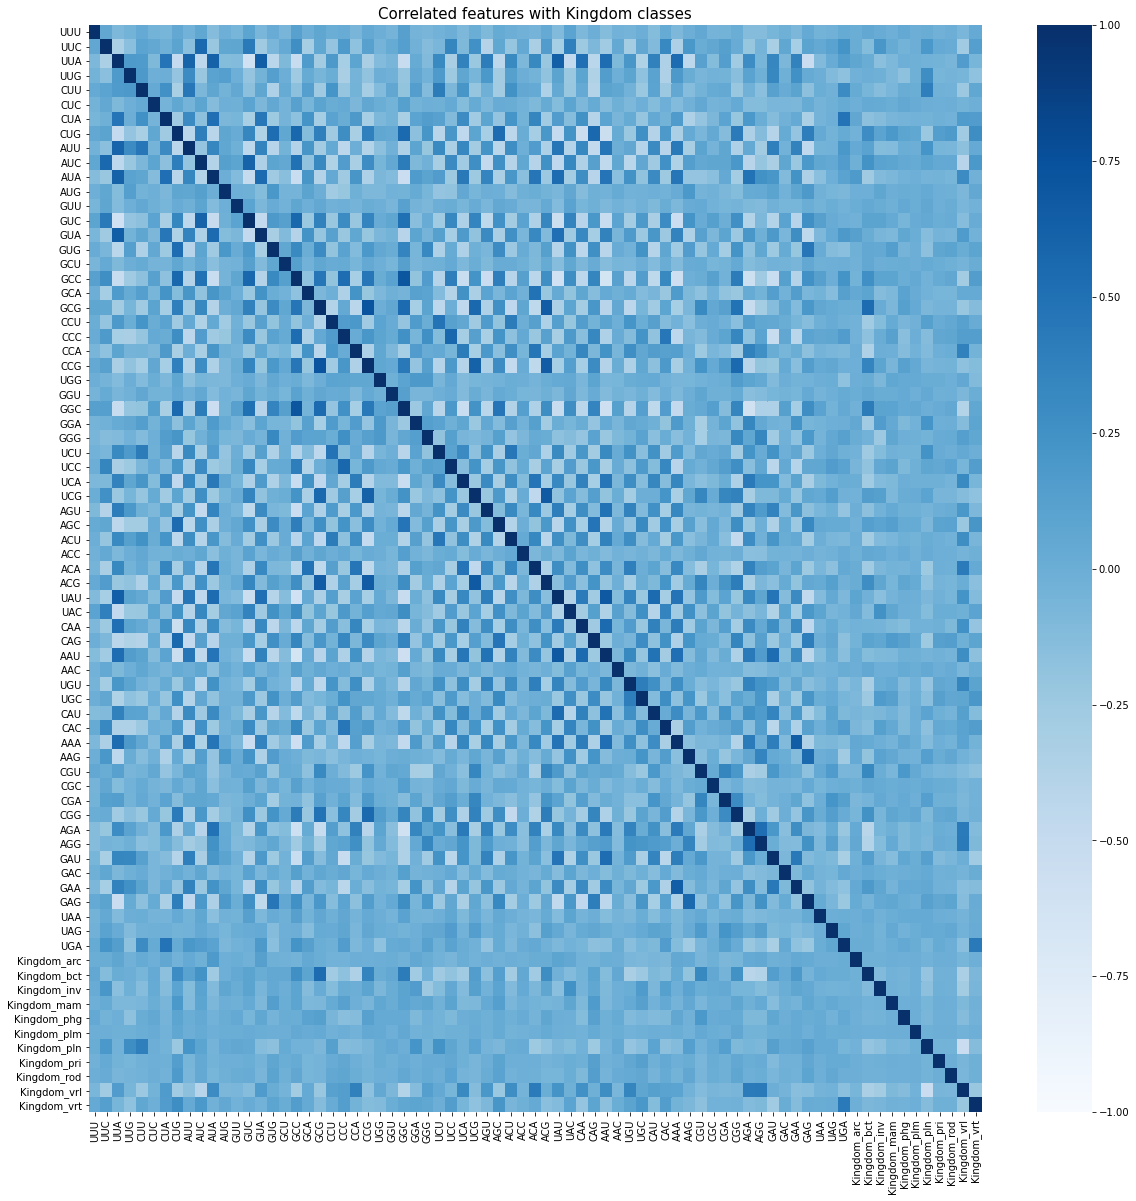

In [17]:
#plot the correlation using an heatmap
plt.figure(figsize=(20,20))
k = kingdom_train_onehot.corr()
fig5= sns.heatmap(k,vmin = -1, vmax = 1, center= 0, cmap = "Blues") #create seaborn heatmap
plt.title('Correlated features with Kingdom classes', fontsize = 15) #title
plt.show()

<p> From a visual inspection of the heatmap is possible to see that there are some <b>positive correlation</b> between codon samples and kingdom classes.<br>
    For example:
    <ul>
        <li> <b>'bct'</b> is positive correlated to GCG, GGC, ACG </li>
        <li> <b>'plm'</b> is postive correlated to UUC, UUG, CUU and GGA </li> 
        <li> <b>'vrl'</b> is positive correlated to AUA, CCA, UCA, ACA, AGA and AGG</li> 
        <li> <b>'vrt'</b> is positive correlated UGA, AGC and CUG </li> <br>
        </li>

To be more precise and determine which are the most important codons in each class we can use the <code>mutual_info_classif</code> algorithm from the <code>scikit-learn</code> package that allows us to perform a "filtering" feature selection using the mutual information concept.<br>
<b>Mutual information</b> between two random variables is a non-negative value which measures the dependency between the categorical features.

In [18]:
#create a feature matrix (n_samples, n_features)
X_kingdom_train = kingdom_train.drop("Kingdom", axis=1)

#create a target array (n_samples)
y_train = kingdom_train["Kingdom"]

print("X_kingdom_train.shape ", X_kingdom_train.shape)
print("y_train.shape ", y_train.shape)

classes = np.sort(y_train.unique())
codons = X_kingdom_train.columns

X_kingdom_train.shape  (3383, 64)
y_train.shape  (3383,)


In [19]:
#mutual information
mutual_info = sklearn.feature_selection.mutual_info_classif(X_kingdom_train,y_train)

#index of the estimated mutual infomation(from the highest to the lowest)
c = mutual_info.argsort()[::-1]

#codon frequency with the highest MI
maincodons=list(codons[c])

print("The 10 most important codons are",maincodons[0:10])

The 10 most important codons are ['AGA', 'AGG', 'UGU', 'GGC', 'ACA', 'CGU', 'GCG', 'CUU', 'CUG', 'AUA']


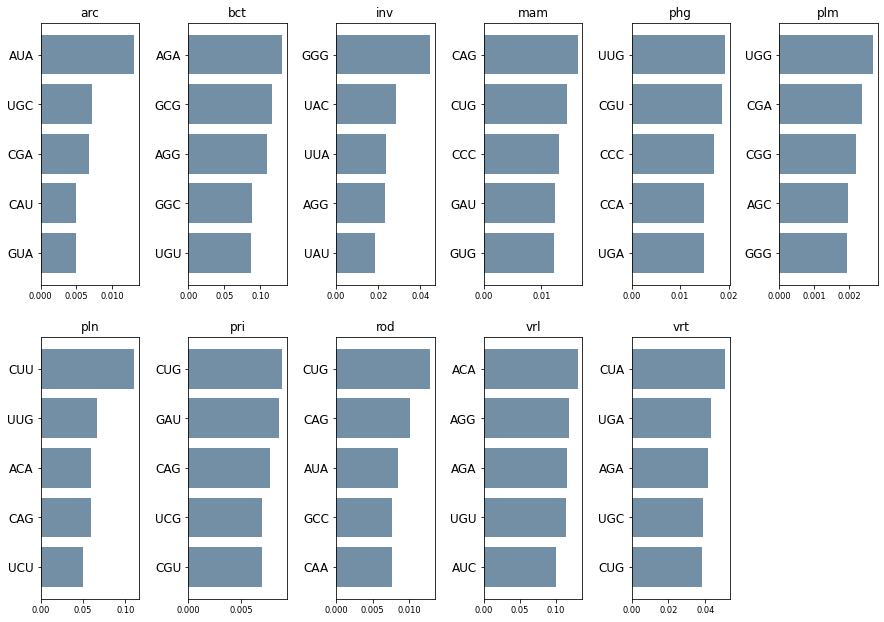

In [20]:
maxinfo={}
varcodons=[]
mi_pd = pd.DataFrame(columns=codons)

#max info will contain: 5 most informative codons and MI for those.
#vargenes will contain all the 5 most informative codons for all 11 classes (total 55)
for c in classes:
    mi_class=sklearn.feature_selection.mutual_info_classif(X_kingdom_train, y_train==c)
    newrow=pd.Series(mi_class,index=codons,name=c)
    mi_pd=mi_pd.append(newrow)
    c_class=mi_class.argsort()
    sortedcodons=list(codons[c_class])[::-1]
    varcodons+=sortedcodons[0:5]
    maxinfo[c]={"codons":sortedcodons[0:5],"MI":list(mi_class[c_class][::-1][0:5])}
    
    
#plot the most correlated codons per class
plt.close()
i=1
fig=plt.figure(figsize=(15,4))
plt.subplots_adjust(top=5,bottom=3)
fig.subplots_adjust(wspace=0.5,hspace=0.2)
for c in classes:
    a=fig.add_subplot(2,6,i)
    i+=1
    plt.barh(maxinfo[c]["codons"],maxinfo[c]["MI"], color="#728FA5")
    plt.title(c)
    plt.xticks(size="small")
    plt.yticks(size="large")
    a.invert_yaxis()

<p> In the plots is possible to notice that some codons as <b>AUA, CCC</b> and <b>AGA</b> are related to different classes. <br> <br>
    If we compare these results to the previous ones obtained from the correlation matrix we notice that in some classes the positive correlated features are almost the same as those identified using the mutual information (i.e., in "vrl" ACA, AGA, AGG match), whereas on other classes(i.e., "plm")  we do not notice this strong and clear correspondence between the positive correlated and the selected important features (for example in "plm"). <br>
    Focusing on <b>AGA</b> and <b>ACA</b> we notice that:
<ul> 
    <il> AGA is present in 'bct', 'vrl' and 'vrt' classes;<br></il>
    <il> ACA is present in 'pln' and 'vrl' classes. <br><br>
        Note that both AGA and ACA are listed in 'vrl'; their presence underlines a strong dependece with this specific class and so, their absence in the <code>test</code> dataset, might influence the outcome of the future analysis.
        </ul>
        
    

<h3>PCA for data visualization</h3>

<p> Before using clustering algorithms to see if there are structures in the data, we perform a dimensionality reduction using the <b>Principal Component Analysis</b>.<br>
    PCA is an algorithm useful for filter, select important features and visualize high dimensional data in a 3D space by transforming the features into a new set of features orthogonal to each other.<br> <br>
    Since PCA provides a comparison between the explained variances in the dataset, data need to be <b>normalized</b> in order to avoid giving too much importance to a variable instead of another just because they are not in the same scale.<br> <br>
    To reach this first purpose we use and compare the performance, in terms of <b>cumulative expressed variance</b>, of two algorithms: the <code>StandardScaler</code> and the <code>MinMaxScaler</code> from <code>scikit-learn</code> package. <br><br>
    <b>Reminder</b>: the following analysis are performed on the reduced dataset deriving from the outliers removal.
   

In [21]:
#data for PCA

kingdom_train["Kingdom"] = pd.Categorical(kingdom_train["Kingdom"])

X = np.array(kingdom_train.drop("Kingdom", axis = 1))
y = np.array(kingdom_train["Kingdom"].cat.codes)
y_cat = np.array(kingdom_train["Kingdom"])

label_dict = {np.unique(y)[k] : np.unique(y_cat)[k]
             for k in range(len(np.unique(y_cat)))}

In [22]:
#StandardScaler makes mean = 0 and scales the data to unit variance
X_kingdom_ss = StandardScaler().fit_transform(X)
#MinMax scales all the data features in the range [0,1]
X_kingdom_mm = MinMaxScaler().fit_transform(X)

In [23]:
def pca_varexp(X, title):
    pca = PCA().fit(X)
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), color="cadetblue", linewidth=5.0)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title(title)
    major_ticks = np.arange(0, X.shape[1], 10)
    minor_ticks = np.arange(0, X.shape[1], 1)
    ax.set_xticks(major_ticks)
    ax.set_ylim([0,1])
    ax.set_xticks(minor_ticks, minor=True)
    plt.grid()
    plt.show()
    
def plot_pca2d(X, y_cat,title):
    pca2 = PCA(n_components=2)  # project from 64 to 2 dimensions
    projected2 = pca2.fit_transform(X)

    fig = plt.figure(figsize=(15,7))
    sns.scatterplot(projected2[:, 0], projected2[:, 1], hue=y_cat, edgecolor='k',
                    palette=sns.color_palette("Blues", n_colors=np.unique(y_cat).shape[0]))
    plt.xlabel('PC 1 (%.2f%%)' % (pca2.explained_variance_ratio_[0]*100))
    plt.ylabel('PC 2 (%.2f%%)' % (pca2.explained_variance_ratio_[1]*100))
    plt.title(title)
    plt.show() 

def plot_pca3d(X, y, df,title):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(20, 20), dpi=50)
    ax = fig.add_subplot(111, projection='3d')

    pca = PCA(n_components=3)
    pca.fit(X)
    X_trans = pca.transform(X)

    labelTups = list(zip(list(y),list(df['Kingdom'])))
    labelTups = list(set(labelTups))
    label_dict = {item[0]: item[1] for item in labelTups}

    sc = ax.scatter(X_trans[:, 0], X_trans[:, 1], X_trans[:, 2], c=y, 
                    cmap=plt.cm.get_cmap("Blues"), edgecolor='k', s=130)

    result=pd.DataFrame(X_trans, columns=['PCA%i' % i for i in range(3)], 
                        index=df.index)

    colors = [sc.cmap(sc.norm(i)) for i in [t[0] for t in labelTups]]
    custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                    mec='k', mfc=c, mew=.1, ms=20) for c in colors]
    ax.legend(custom_lines, [lt[1] for lt in labelTups], 
              loc='center left', bbox_to_anchor=(1.0, .5))

    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
    ax.set_ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
    ax.set_zlabel('PC 3 (%.2f%%)' % (pca.explained_variance_ratio_[2]*100))
    ax.set_title(title)
    plt.show()

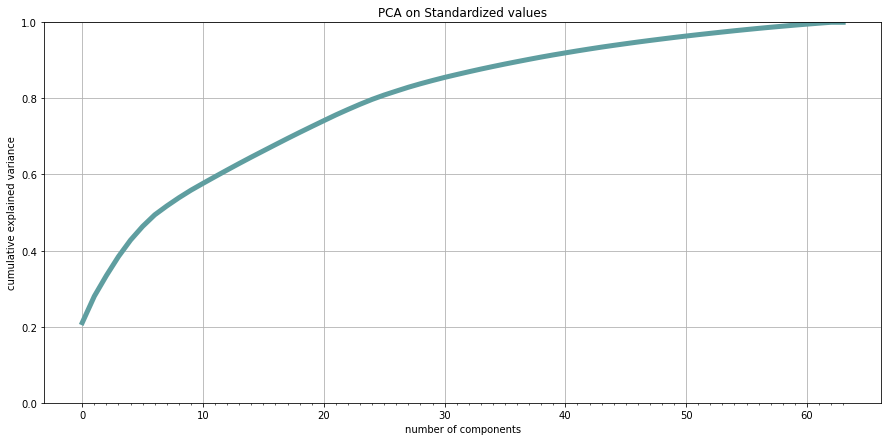

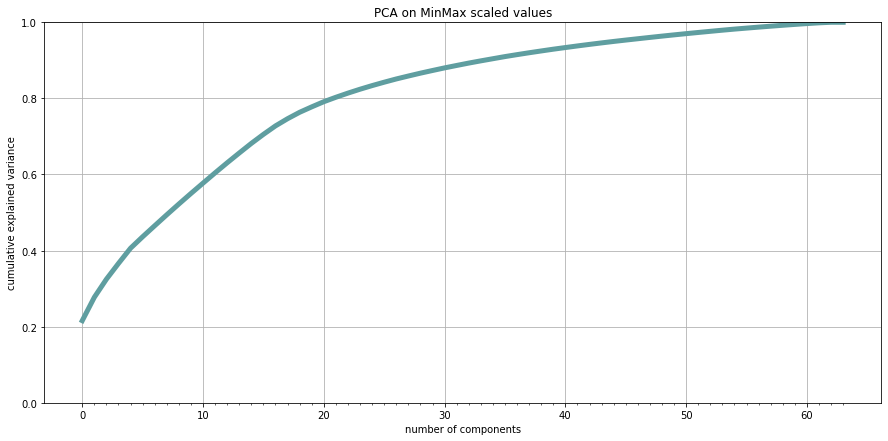

In [24]:
#comparison between the technique
pca_varexp(X_kingdom_ss, "PCA on Standardized values")
pca_varexp(X_kingdom_mm, "PCA on MinMax scaled values")

<p> From the graph we can see that the two curves are very similar between each other but PCA using <code>MinMaxScaler</code> seems perform better in the sense that the first <b>20 PC</b> explain <b>80% of the variance</b> while, to reach this value, about 25 PC are needed in standardized values. <br>

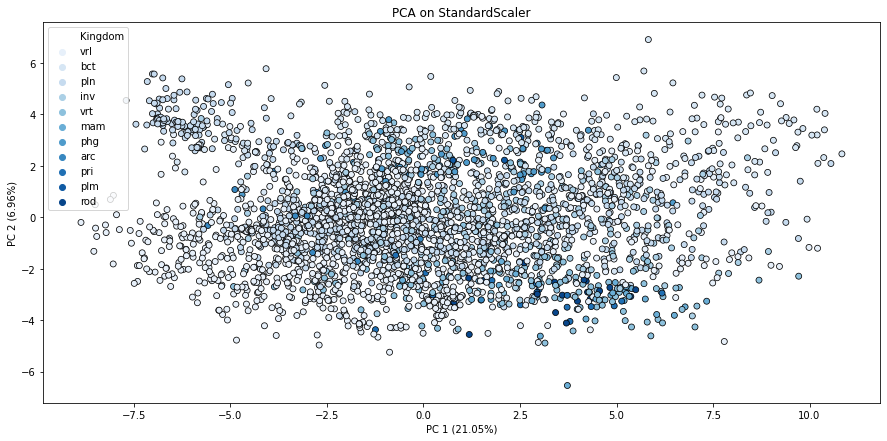

In [25]:
#2d PCA on StandardScaler data
plot_pca2d(X_kingdom_ss,y_train, "PCA on StandardScaler")

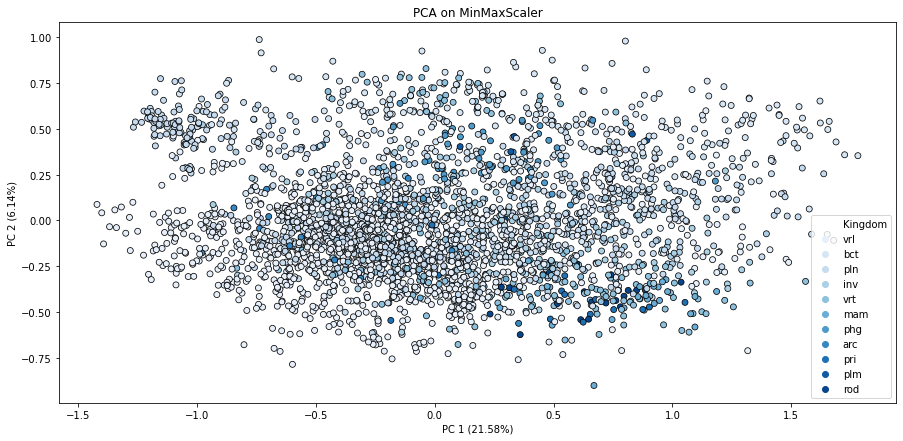

In [26]:
#2d PCA on MinMaxScaler data
plot_pca2d(X_kingdom_mm, y_train, "PCA on MinMaxScaler")


<p> Plotting the results in 2D confirm the fact that the two technique produce very similar results and seems that using one approach instead of the other does not cause big differences.<br>
    In both cases the <b>first PC</b> and the <b>second PC</b> explain, respectively, about <b>21%</b> and <b>6% of the variability</b>. <br> <br>
    Below are showed the 3D plot of the two scaler,</code> in which it is possible to see that the <b>third PC</b> explains about <b>5% of variability</b> in both cases. <br>

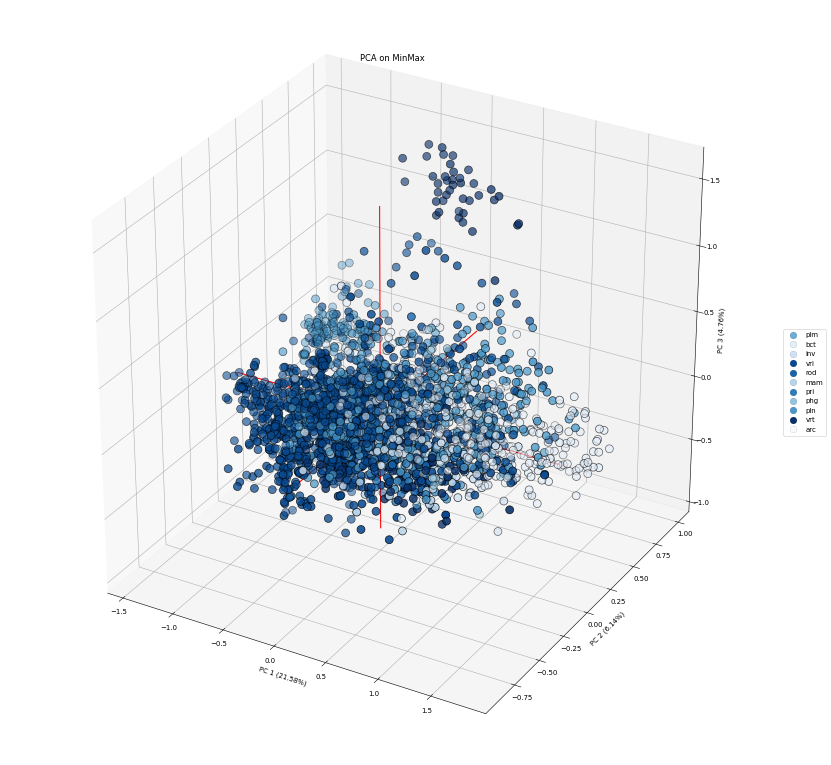

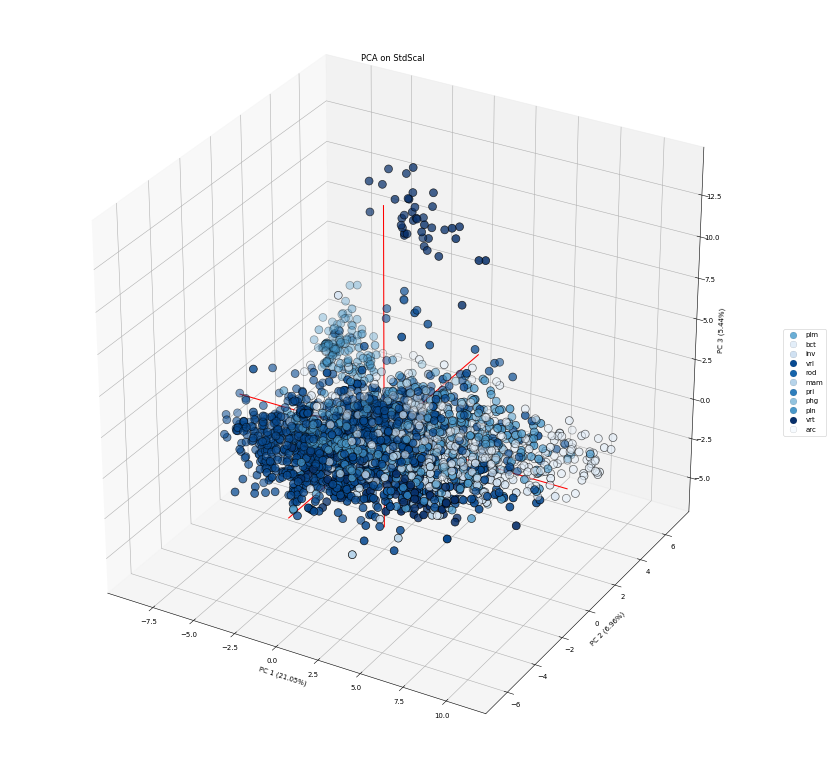

In [27]:
#3d visualization of data
plot_pca3d(X_kingdom_mm, y, kingdom_train, "PCA on MinMax")
plot_pca3d(X_kingdom_ss, y, kingdom_train, "PCA on StdScal")

Observing the plot the main difference that can be noticed is the fact that <code>Standard Scaler</code>data seems to have an elliptical shape whereas <code>MinMaxScaler</code> take a more globular one. <br>
In both cases there is the presence of a clustered group along the 2nd axis but, in general, it is very difficult to see definite groups in these plots. This difficulty is probably due to the high-dimensionality of the dataset and to the high number of samples.

<h2> 1.3.1 Clustering on Kingdom classes </h2>

<p> Clustering is an <b>unsupervised machine learning method</b> used to exploit regularity in the input data and try to organize objects into groups with the aim of understand better the data we are using.<br>
    The concept behind clustering is the fact that objects(i.e., data) belonging to the same cluster are "similar" between each other and are "dissimilar" to the objects belonging to other clusters. <br> <br>
    In that case we already know that data are labeled into <b>11 kingdom</b>, despite this we will use different clustering algorithms to see (and check) if they are able to catch the "real" data structure. <br>
    
<b> Reminder </b> these analysis are performed on <b>reduced dataset</b> and in the procedure both <code>MinMaxScaler</code> and <code>StandardScaler</code> data are tested.

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import pairwise_distances

<h3> Hierachical Clustering </h3>

<p> Hierarchical clustering is a method that performs the division of samples in a hierarchy of clusters based on a distance measure.<br>
    In that case we will use a <b>bottom-up</b> or <b>agglomerative</b> approach: starting from <i>n</i> clusters we end up with a unique cluster. 

In [29]:
#some useful function for clustering visualization and evaluation

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

def get_node_leaves(Z, idx, N):
    n1, n2 = Z[idx,0], Z[idx,1]
    leaves = []
    for n in [n1, n2]:
        leaves += [int(n)] if n < N else get_node_leaves(Z, int(n-N), N)
    return leaves

def get_node(Z, X, y, idx, dic):
    title = str(idx)
    leaves = get_node_leaves(Z, idx, X.shape[0])
    labels, counts = np.unique(y[leaves], return_counts=True)
    labels_cat = [dic[i] for i in labels]
    count_abs = np.unique(y, return_counts=True)
    nleaves = len(leaves)
    freq = []
    for idx, val in enumerate(counts):
        index = np.where(labels[idx]==count_abs[0])
        fr = val/count_abs[1][index]
        freq.append(float(fr))
    freq = np.array(freq)
#   print(np.concatenate(np.array(counts).reshape(1,-1), freq))
    print(pd.DataFrame([counts,freq], 
                       columns=labels_cat, index=["Count:","Frequency:"]))
    print("Samples in the cluster:", len(leaves), "/", X.shape[0])
    y_pos = np.arange(len(labels_cat))
    plt.bar(y_pos, counts)
    plt.ylim(0,50)
    plt.title(title)
    plt.xticks(y_pos, labels_cat)
    plt.show()

def plot_clust_2d(X, y_cat, y_predict,title):
    pca2 = PCA(n_components=2)  # project from 64 to 2 dimensions
    projected2 = pca2.fit_transform(X)    
    fig = plt.figure(figsize=(10,5))
    
    sns.scatterplot(projected2[:, 0], projected2[:, 1], hue=y_cat, edgecolor='k', style=y_predict,
                    palette=sns.color_palette("Blues", n_colors=np.unique(y_cat).shape[0]))
    plt.xlabel('PC 1 (%.2f%%)' % (pca2.explained_variance_ratio_[0]*100))
    plt.ylabel('PC 2 (%.2f%%)' % (pca2.explained_variance_ratio_[1]*100))
    plt.title(title)
    plt.show()
    
def plot_clust_3d(X, y, df, y_predict, title):
    
    fig = plt.figure(figsize=(20, 20), dpi=80)
    ax = fig.add_subplot(111, projection='3d')
    used = set()
    uniq = [x for x in y if x not in used and (used.add(x) or True)]
    colors = sns.color_palette("Blues", n_colors=11).as_hex()
    col_legend = [colors[i] for i in uniq]
    markers = [".","v","s","*", "X","p","d","^","o","h","+"]
    
    pca = PCA(n_components=3)
    pca.fit(X)
    X_trans = pca.transform(X)
    
    used2 = set()
    labelTups = list(zip(list(y),list(df['Kingdom'])))
    labelTups = [x for x in labelTups if x not in used2 and (used2.add(x) or True)]
    #labelTups = list(set(labelTups))
    #label_dict = {item[0]: item[1] for item in labelTups}

    for i in range(len(X_trans)):
        ax.scatter(X_trans[i, 0], X_trans[i, 1], X_trans[i, 2], c=colors[y[i]],
                   marker=markers[y_predict[i]],
                   edgecolor='k', s=130)


    result=pd.DataFrame(X_trans, columns=['PCA%i' % i for i in range(3)], 
                        index=df.index)

    custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                    mec='k', mfc=c, mew=.1, ms=20) for c in col_legend]
    ax.legend(custom_lines, [lt[1] for lt in labelTups], 
              loc='center left', bbox_to_anchor=(1.0, .5))

    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # ax.text(x=0.74048959,y=-1.85937686,z=1.64074746,s= 'ciao')
    #  to check if correct color-legend assignment
    # label the axes
    ax.set_xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
    ax.set_ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
    ax.set_zlabel('PC 3 (%.2f%%)' % (pca.explained_variance_ratio_[2]*100))
    ax.set_title(title)
    plt.show()
    
def plot_cm(labels_true, labels_pred, labels_dict):
    cm = contingency_matrix( labels_true = labels_true, labels_pred = labels_pred)
    fig, ax = plt.subplots(figsize=(6,6))
    plt.imshow(cm,interpolation='none',cmap='tab20c')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    ax.set_yticks(range(len(list(labels_dict.keys()))))
    ax.set_yticklabels(list(labels_dict.values()))
    plt.xlabel("hclust label")
    plt.ylabel("truth label")
    plt.show()

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        # Compute combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]   

def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_sim(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(12,8))  
    ax = sns.heatmap(sim, ax=ax,cmap='coolwarm')
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])
    plt.show()

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)

def get_Ncounts(y_predict, y, k, j=None):
    N = y.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj
    
def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y):
    N = y.shape[0]
    nc = len(np.unique(y))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y, k)
        pk = purity(y_predict, y, k)
        p += (Nk / N) * pk
    return p   

metr ="euclidean"
link= "ward"

<p> Bottom-up hierarchical clustering results depends on two "parameters"/decision:<br>
    1. The <b>metric</b> used to define distances between two data points (eg.Euclidean, Manhattan, cosine similarity) <br>
    2. The <b>linkage criteria</b> used to determine how to merge clusters togheter.<br><br>
    Once established the metric there are 5 linkage methods that can be applied:
            <ul>
                <li> <b> Single linkage</b>: minimizes the distance between the closest observations of pairs of clusters. </li>
            <li> <b> Complete linkage </b>: minimizes the maximum distance between observations of pairs of clusters. </li>
            <li> <b> Averge linkage</b>: minimizes the average of the distances between all observations of pairs of clusters. </li>
            <li> <b>Centroid linkage</b>:  minimizes the distance between centroids of pairs of clusters </li>
            <li> <b>Ward linkage</b>: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach (similar to k-means) </b> </li> <br>
            As there might be mutilple combination of metrics and methods, in the following sections, only the best results will be shown. <br>


<b> MinMax Data</b>

In [30]:
#run to see the 5 different plots deriving from test different linkage methods with euclidean distance
#methods = ["single", "complete", "average", "centroid", "ward"]

#for method in methods:
    #Z = linkage(X_kingdom_mm, metric='euclidean', method=method)
    #fig, ax = plot_dendrogram(Z=Z,X=X_kingdom_mm, truncate_mode='lastp', 
                              #p=100, n_clusters=11)
    #ax.set_title(method)

<b>Ward linkage</b> seems to perform better than the other methods in producing a readable dendogram using as metric the <i> euclidean distance</i> (it is choosen because is the only supported by the ward linkage).<br>
Also the complete linkage produced a good dendogram but it performed poorer than the ward in the evaluation metrics(so the results are not shown).<br>
Single, centroid and average linkage performed the worst: they failed in the detection of the 11 clusters. <br>

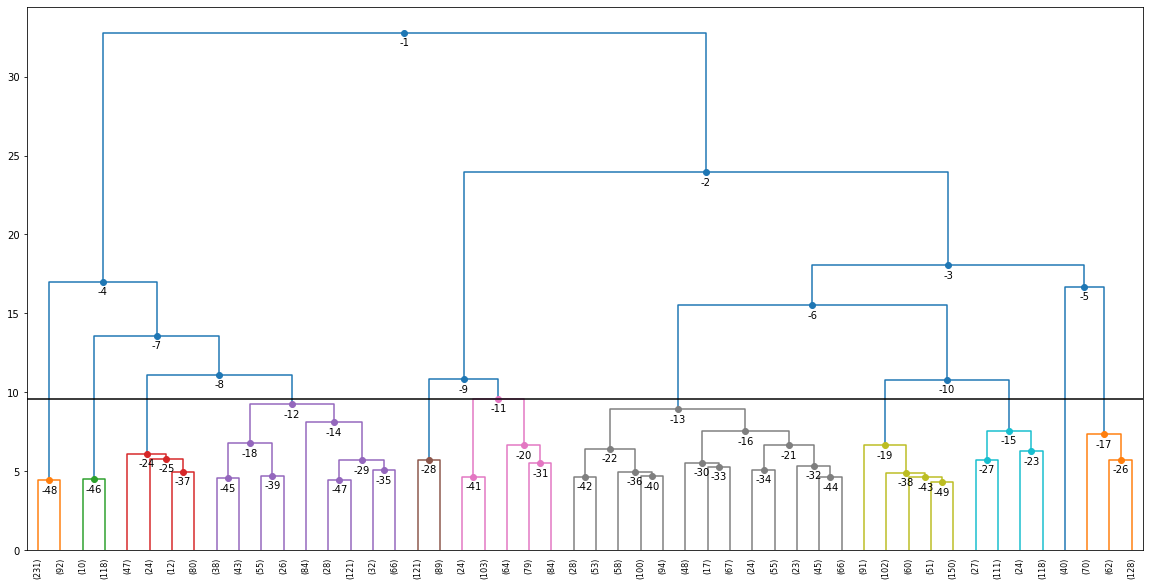

In [31]:
# Ward linkage visualized
Z = linkage(X_kingdom_mm, metric='euclidean', method='ward')
plot_dendrogram(Z=Z, X=X_kingdom_mm,truncate_mode='lastp', 
                p=50, n_clusters=11)
plt.show()

                 pln         vrl       vrt
Count:      2.000000  320.000000  1.000000
Frequency:  0.002463    0.200376  0.005714
Samples in the cluster: 323 / 3383


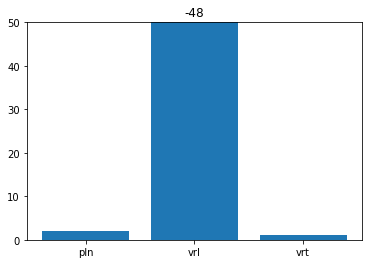

                bct         pln       vrl
Count:      7.00000  120.000000  1.000000
Frequency:  0.01847    0.147783  0.000626
Samples in the cluster: 128 / 3383


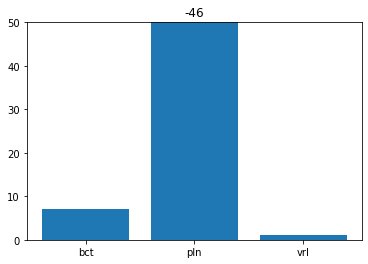

                 inv         vrl       vrt
Count:      1.000000  160.000000  2.000000
Frequency:  0.003774    0.100188  0.011429
Samples in the cluster: 163 / 3383


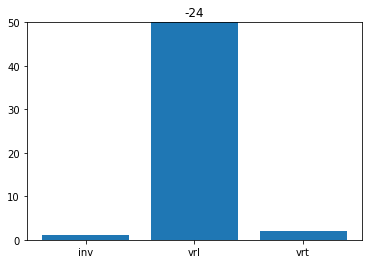

                 arc        bct        inv       phg        pln       pri  \
Count:      2.000000  48.000000  55.000000  7.000000  79.000000  1.000000   
Frequency:  0.142857   0.126649   0.207547  0.114754   0.097291  0.058824   

                   vrl       vrt  
Count:      300.000000  1.000000  
Frequency:    0.187852  0.005714  
Samples in the cluster: 493 / 3383


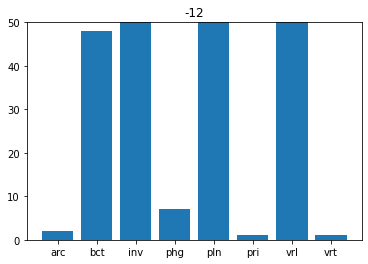

                 bct        inv        mam        pln        pri        rod  \
Count:      3.000000  35.000000  21.000000  37.000000  13.000000  19.000000   
Frequency:  0.007916   0.132075   0.583333   0.045567   0.764706   0.863636   

                 vrl        vrt  
Count:      13.00000  69.000000  
Frequency:   0.00814   0.394286  
Samples in the cluster: 210 / 3383


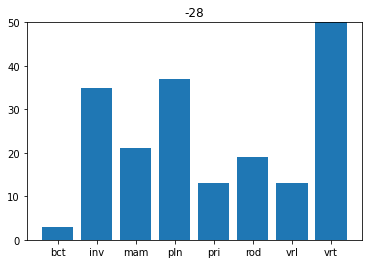

                  bct        inv       mam      phg  plm         pln  \
Count:      82.000000  41.000000  1.000000  3.00000  2.0  160.000000   
Frequency:   0.216359   0.154717  0.027778  0.04918  0.4    0.197044   

                  vrl       vrt  
Count:      64.000000  1.000000  
Frequency:   0.040075  0.005714  
Samples in the cluster: 354 / 3383


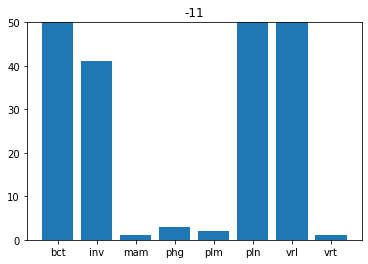

                  bct         inv        mam        phg         pln       pri  \
Count:      22.000000  107.000000  13.000000  13.000000  125.000000  3.000000   
Frequency:   0.058047    0.403774   0.361111   0.213115    0.153941  0.176471   

                 rod         vrl        vrt  
Count:      3.000000  335.000000  57.000000  
Frequency:  0.136364    0.209768   0.325714  
Samples in the cluster: 678 / 3383


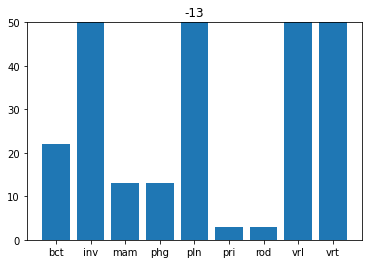

                 bct        inv         pln        vrl       vrt
Count:      9.000000  22.000000  285.000000  136.00000  2.000000
Frequency:  0.023747   0.083019    0.350985    0.08516  0.011429
Samples in the cluster: 454 / 3383


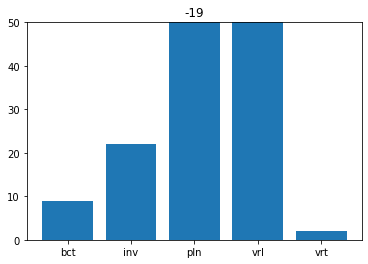

                  arc       inv       mam       pln        vrl       vrt
Count:      10.000000  2.000000  1.000000  1.000000  264.00000  2.000000
Frequency:   0.714286  0.007547  0.027778  0.001232    0.16531  0.011429
Samples in the cluster: 280 / 3383


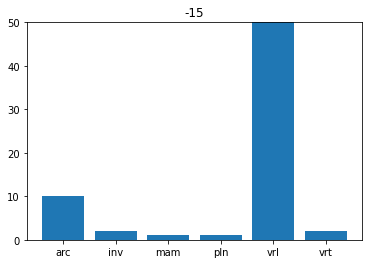

                 arc         bct       inv        phg  plm       pln  \
Count:      2.000000  208.000000  2.000000  38.000000  3.0  3.000000   
Frequency:  0.142857    0.548813  0.007547   0.622951  0.6  0.003695   

                 vrl        vrt  
Count:      4.000000  40.000000  
Frequency:  0.002505   0.228571  
Samples in the cluster: 300 / 3383


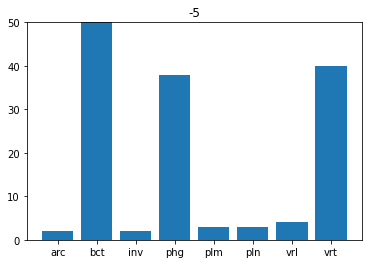

                 arc        bct        inv      phg        pln       pri  \
Count:      2.000000  19.000000  48.000000  3.00000  35.000000  1.000000   
Frequency:  0.142857   0.050132   0.181132  0.04918   0.043103  0.058824   

                  vrl  
Count:      41.000000  
Frequency:   0.025673  
Samples in the cluster: 149 / 3383


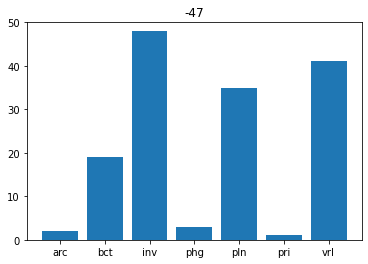

In [32]:
#nodes exploration
get_node(Z,X_kingdom_mm,y, -48, label_dict) #majority of vrl
get_node(Z,X_kingdom_mm,y, -46, label_dict) #majority of pln
get_node(Z,X_kingdom_mm,y, -24, label_dict) #majority of vrl
get_node(Z,X_kingdom_mm,y, -12, label_dict) #almost the same number of bct,inv,pln,vrl
get_node(Z,X_kingdom_mm,y, -28, label_dict) #max vrt and than the other
get_node(Z,X_kingdom_mm,y, -11, label_dict) #almost the same number of bct, inc, pln, vrl
get_node(Z,X_kingdom_mm,y, -13, label_dict) #max value of bct, inv, pln, vrl, vrt
get_node(Z,X_kingdom_mm,y, -19, label_dict) #max value of pln, vrl than the other
get_node(Z,X_kingdom_mm,y, -15, label_dict) #max value of vrl small sample of arc
get_node(Z,X_kingdom_mm,y, -5,  label_dict) # we have 2 nodes indside but there is no a clear divisions
get_node(Z,X_kingdom_mm,y, -47, label_dict) #almost the same number of inv, pln, vrl

<p> Barplots show the overall number of samples, the count and the frequency of each class in a precise node.<br>
    In -48 and -24 we have almost the same number of "vrl" samples whereas -46 is composed only by "pln".<br>
    A brief description of what is shown in each barplot is reported near to the code but in general is difficul to see clear pattern among the classes in the different nodes.<br>
    The only "costant" pattern is the fact that "bct", "inv", "pln", "vrl" are often grouped togheter with an high value (this second observation might be explained by the fact that they are the most numerous classes).
    

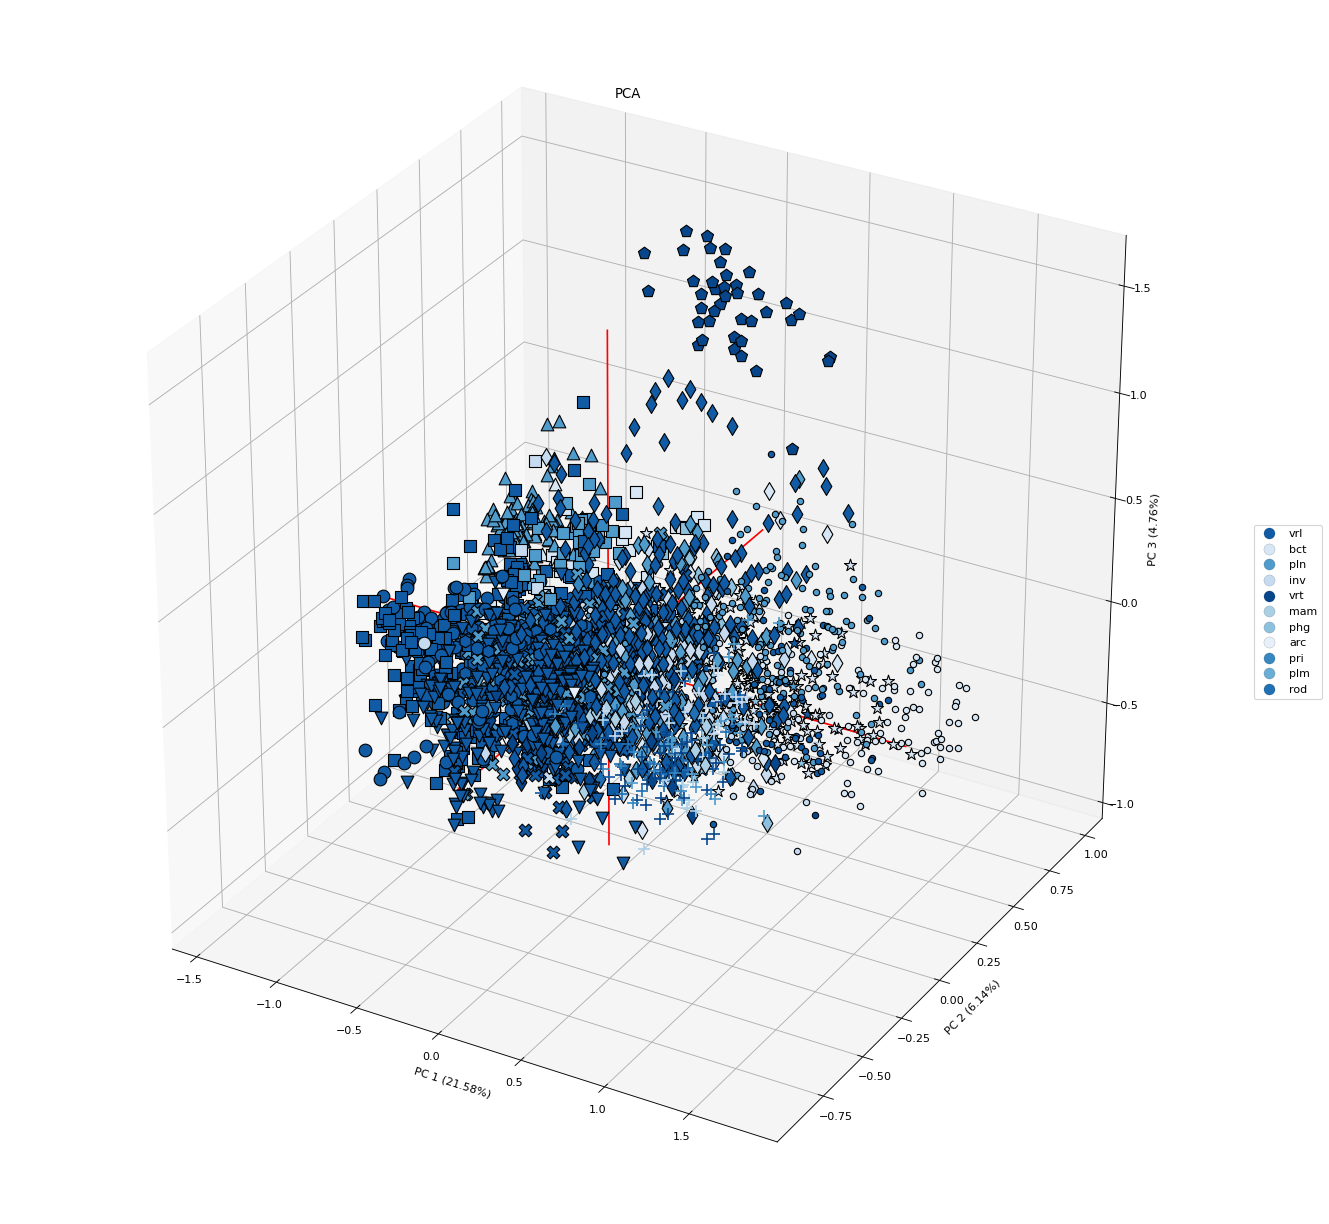

In [33]:
#another way to visualize
distance_threshold=None
n_clusters=11

model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=distance_threshold, 
                                affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X_kingdom_mm)
plot_clust_3d(X_kingdom_mm, y, kingdom_train,y_predict, "PCA")

In this 3D plot data appear more clustered than before (where we plotted just the PCA) but still there is no a clear pattern of clustered data (except for the clustered "vrl"samples up to the 2nd PC).

<b> StandardScaler Data</b>

In [34]:
#run to see the 5 different plots deriving from test different linkage methods with euclidean distance
#methods = ["single", "complete", "average", "centroid", "ward"]

#for method in methods:
    #Z = linkage(X_kingdom_ss, metric='euclidean', method=method)
    #fig, ax = plot_dendrogram(Z=Z,X=X_kingdom_ss, truncate_mode='lastp', 
                              #p=100, n_clusters=11)
    #ax.set_title(method)

The resulting plots are very similar to the previous case: <b>ward linkage</b> is the best method among all the other in producing the dendogram.

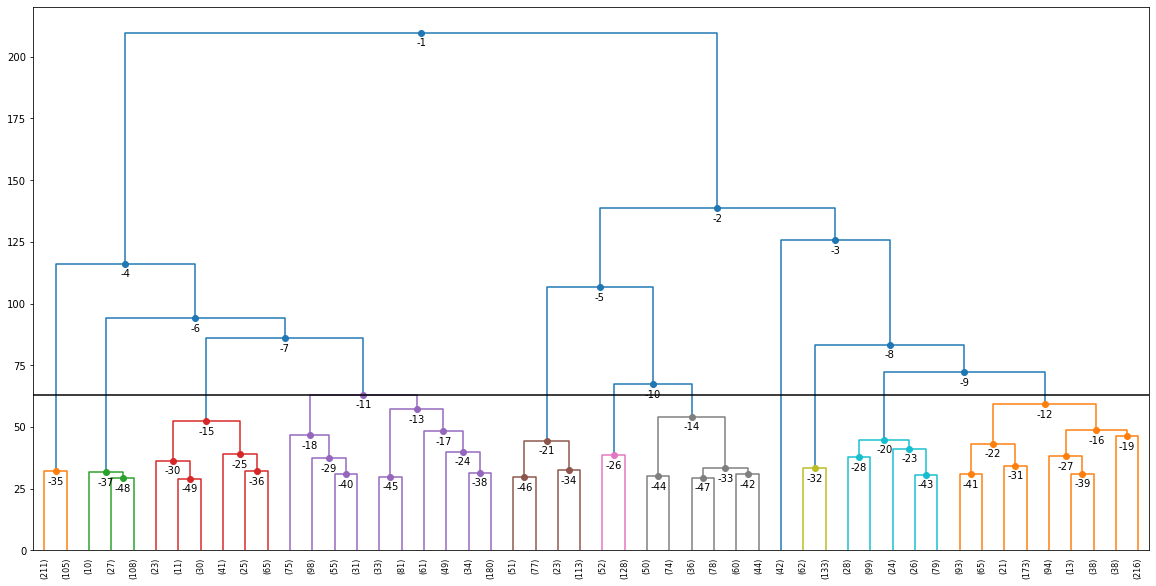

In [35]:
# Ward linkage visualized
Z = linkage(X_kingdom_ss, metric='euclidean', method='ward')
plot_dendrogram(Z=Z, X=X_kingdom_ss,truncate_mode='lastp', 
                p=50, n_clusters=11)
plt.show()

                   vrl
Count:      316.000000
Frequency:    0.197871
Samples in the cluster: 316 / 3383


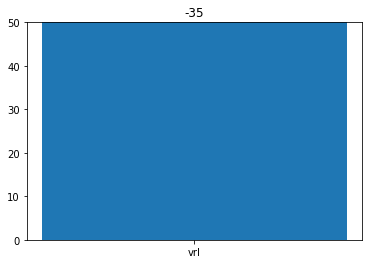

                  pln       vrl
Count:      144.00000  1.000000
Frequency:    0.17734  0.000626
Samples in the cluster: 145 / 3383


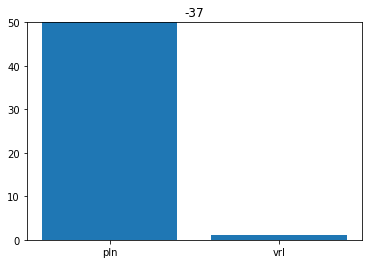

                 pri         vrl       vrt
Count:      1.000000  192.000000  2.000000
Frequency:  0.058824    0.120225  0.011429
Samples in the cluster: 195 / 3383


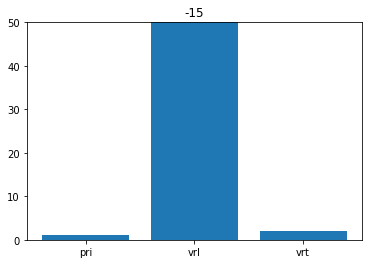

                 arc        bct        inv       mam       phg         pln  \
Count:      1.000000  30.000000  50.000000  2.000000  8.000000  168.000000   
Frequency:  0.071429   0.079156   0.188679  0.055556  0.131148    0.206897   

                   vrl       vrt  
Count:      436.000000  2.000000  
Frequency:    0.273012  0.011429  
Samples in the cluster: 697 / 3383


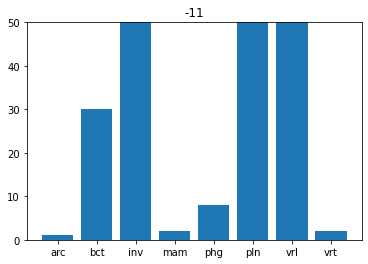

                 arc         bct        inv        phg  plm       pln  \
Count:      2.000000  189.000000  22.000000  34.000000  3.0  3.000000   
Frequency:  0.142857    0.498681   0.083019   0.557377  0.6  0.003695   

                  vrl  
Count:      11.000000  
Frequency:   0.006888  
Samples in the cluster: 264 / 3383


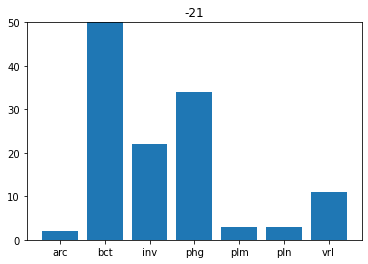

                  bct        inv        phg         pln        vrl
Count:      18.000000  12.000000  14.000000  108.000000  28.000000
Frequency:   0.047493   0.045283   0.229508    0.133005   0.017533
Samples in the cluster: 180 / 3383


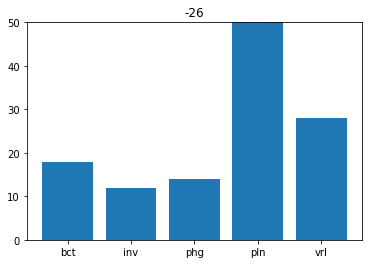

                   bct        inv       phg  plm        pln        vrl  \
Count:      126.000000  42.000000  1.000000  2.0  81.000000  86.000000   
Frequency:    0.332454   0.158491  0.016393  0.4   0.099754   0.053851   

                 vrt  
Count:      4.000000  
Frequency:  0.022857  
Samples in the cluster: 342 / 3383


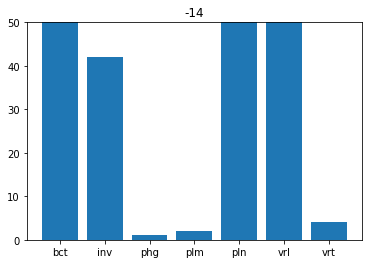

                  arc        bct         inv        mam       phg        pln  \
Count:      11.000000  16.000000  139.000000  34.000000  4.000000  308.00000   
Frequency:   0.785714   0.042216    0.524528   0.944444  0.065574    0.37931   

                  pri   rod         vrl         vrt  
Count:      16.000000  22.0  527.000000  167.000000  
Frequency:   0.941176   1.0    0.329994    0.954286  
Samples in the cluster: 1244 / 3383


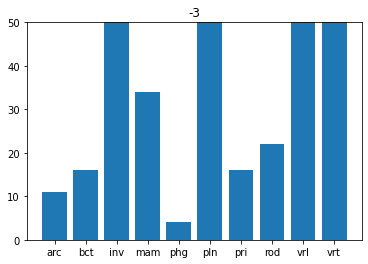

                 inv        mam       pln        pri        rod       vrl  \
Count:      28.00000  32.000000  5.000000  14.000000  21.000000  13.00000   
Frequency:   0.10566   0.888889  0.006158   0.823529   0.954545   0.00814   

                  vrt  
Count:      82.000000  
Frequency:   0.468571  
Samples in the cluster: 195 / 3383


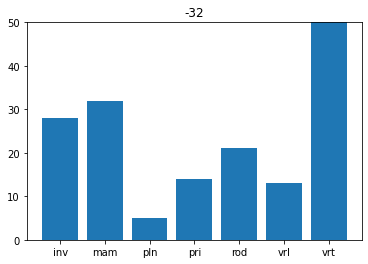

                  arc       bct       pln         vrl       vrt
Count:      11.000000  2.000000  6.000000  234.000000  3.000000
Frequency:   0.785714  0.005277  0.007389    0.146525  0.017143
Samples in the cluster: 256 / 3383


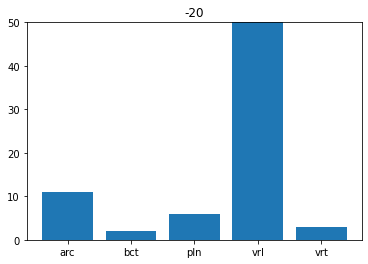

                  bct         inv       mam       phg         pln       pri  \
Count:      14.000000  110.000000  2.000000  4.000000  297.000000  2.000000   
Frequency:   0.036939    0.415094  0.055556  0.065574    0.365764  0.117647   

                 rod         vrl    vrt  
Count:      1.000000  279.000000  42.00  
Frequency:  0.045455    0.174703   0.24  
Samples in the cluster: 751 / 3383


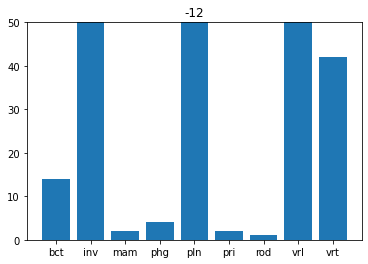

In [36]:
#nodes exploration
get_node(Z,X_kingdom_mm,y, -35, label_dict) #all vrl (similar to MM)
get_node(Z,X_kingdom_mm,y, -37, label_dict) #majority of pln (very similar to MM)
get_node(Z,X_kingdom_mm,y, -15, label_dict) #majority of vrl (very similar to MM)
get_node(Z,X_kingdom_mm,y, -11, label_dict) #almost the same number of bct,inv,pl,vrl (as before)
get_node(Z,X_kingdom_mm,y, -21, label_dict) #max vrt bct than inv, phg
get_node(Z,X_kingdom_mm,y, -26, label_dict) #majority of pln
get_node(Z,X_kingdom_mm,y, -14, label_dict) #max value of bct, inv, pln, vrl, vrt (as before)
get_node(Z,X_kingdom_mm,y, -3, label_dict)  #same value for vrl, vrt,pln, mam
get_node(Z,X_kingdom_mm,y, -32, label_dict) #vrt and rod
get_node(Z,X_kingdom_mm,y, -20,  label_dict) # vrl
get_node(Z,X_kingdom_mm,y, -12, label_dict) #same value for inv, pln, vrl, vrt

<p> From the bar plot is possible to see that most of the data points belonging to the "vrl" and "pln" classes (and this is not surprising since they are one of the most numerous classes). <br>
    The distribution of samples inside each class, is similar to the one observed for MinMax data. This tendency is observed mainly in the first analyzed nodes (e.g. the nodes belonging to the -4 node), whereas in -2 the division a little bit different.<br>
    It is hard to spot distinctions and, in general, there seems to be no clear pattern inside the nodes except for bct, inv, pln, vrl, vrt

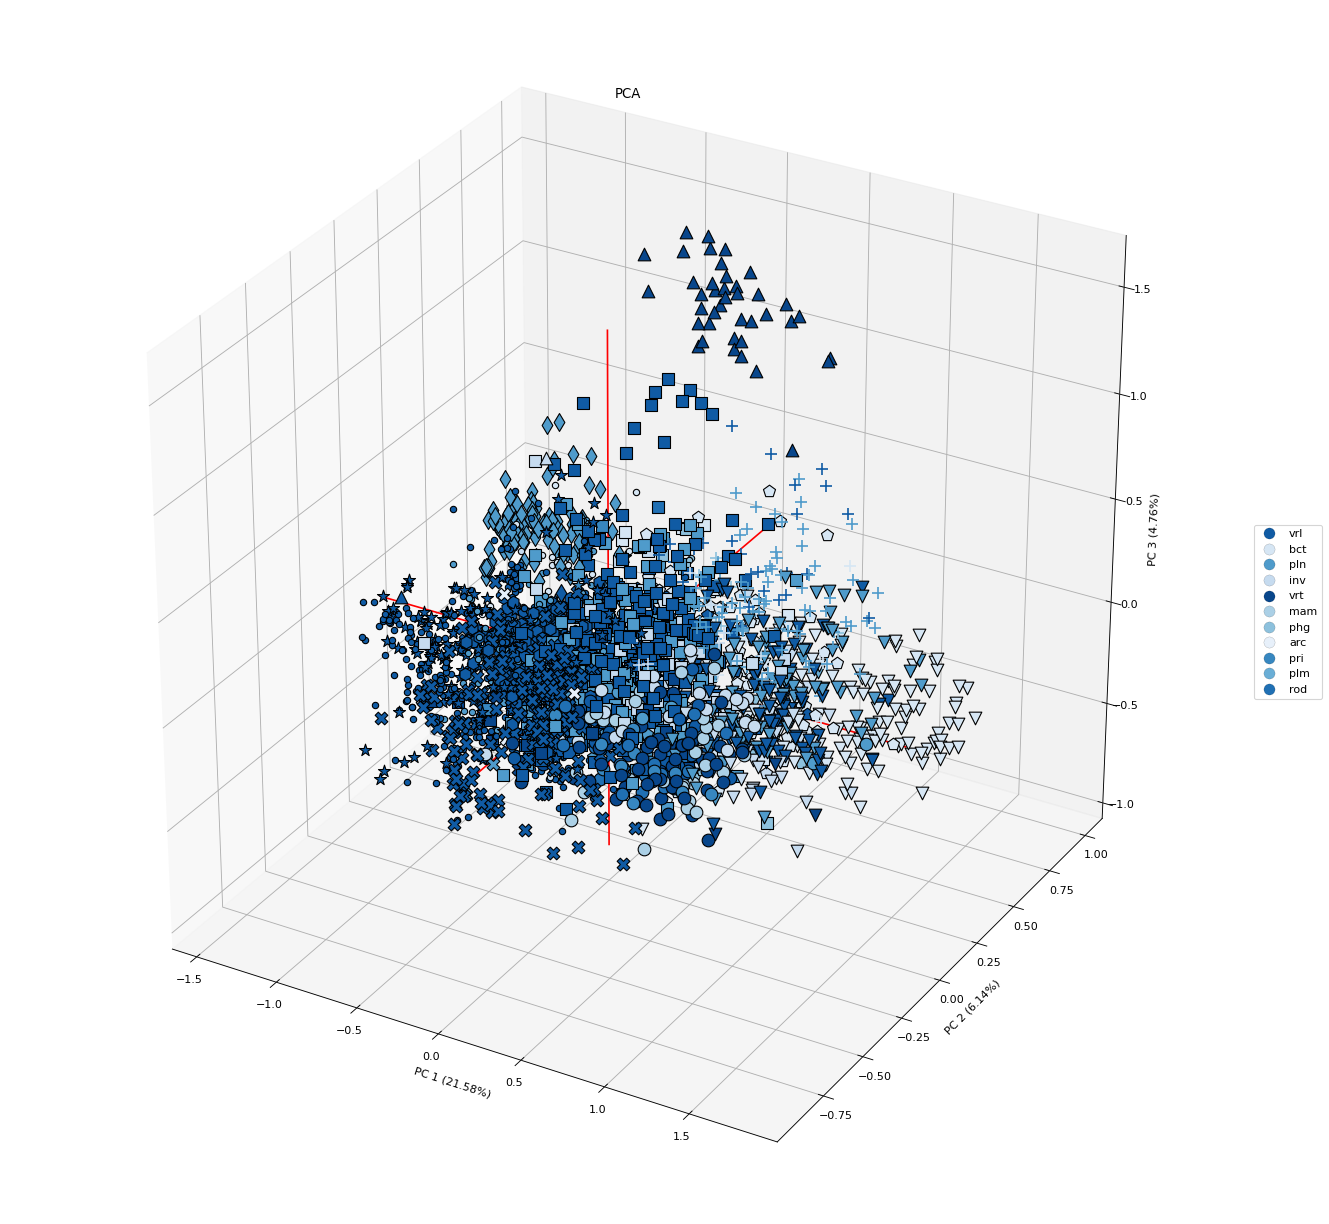

In [37]:
#another way to visualize
distance_threshold=None
n_clusters=11

model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=distance_threshold, 
                                affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X_kingdom_ss)
plot_clust_3d(X_kingdom_mm, y, kingdom_train,y_predict, "PCA")

Also in that case we can see the cluster up along the 2nd PC, plus a second clearly cluster along the 1st PC (white triangles). <br>
The other classes are mixed and it is difficul to make a distinction.

<h3> Clustering Evaluation </h3>

Rather than just looking at the plots and providing a qualitative assessment of the clustering results, we can <b>quantitatively evaluate the quality of the clustering</b> by using different measures coming from different approach.

<ul>
     <li> <b> 1. Cluster validaty via Correlation and visual inspection </b>  </li>
        <ol>
            <ul>
                <li> <b>Similarity matrix</b>: it is a technique for visual inspection.<br>
        It is represented as a block structure in which all the points in one block are coming from the same cluster and so have high similarity and low distance.<br> If the clustering is good there will be more similar blocks on the diagonal and dissimilar blocks off the diagonal.
                </li> <br>
                <li> <b>Correlation</b> between <b>incidence</b> and <b>similarity matrix</b>: it has a value of <b>1</b> if two points are in the same cluster,<b>0</b> otherwise. It cannot be used for density-based clusters.</li><br>
                <li> <b>Contingency matrix</b>:reports the intersection cardinality for every true/predicted cluster pair. It provides sufficient statistics for all clustering metrics where the samples are independent and identically distributed and one doesn’t need to account for some instances not being clustered.</li>
            </ul>



<ul>
     <li> <b>2. Cluster validaty via indexes </b> </li>
        <ol>
            <ul>
                <li> <b> Adjusted random index</b>: : measures the similarity between the true labels and the predicted ones.<br> 1 is perfect, negative measures are bad and 0 means random label assigment. It is related to the accuracy, but is applicable even when class labels are not used. </li><br>
                <li> <b> V-measure </b>:  is defined as harmonic mean between homogeneity (maximized when each cluster contains elements of few different classes as possible) and completeness (maximized when all element of each class are in a single clusters).</li> <br>
                <li><b> Silhouette Score </b>: is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).<br> 
    A higher Silhouette Coefficient score relates to a model with better defined clusters.<br>
            if a < b 
\begin{equation} \label{eq:Silhuette1}
  s(x_{n}) = 1 - \frac{a}{b} 
\end{equation} <br>
            else 
\begin{equation} \label{eq:Silhuette2}
  s(x_{n}) = \frac{b}{a} - 1 
\end{equation} <br>
            This index then describe both the within cluster <b><i>WSS</b></i> and between cluster <b><i>BSS</b></i> similarity and has a <b>range</b> between <b>0</b> and <b>1</b>.</li><br>
                <li><b> Purity </b> : it is a method to evaluate the solution of a clustering alorithm. <br>
                    If a cluster contains only elements of a given class, the purity is <b>1</b>, otherwise the value decreases as the presence of elements from multiple classes increases
    \begin{equation} \label{eq:purity}
  p = \sum\limits_{k = 1}^K \frac{N_{k}}{N} p_{k}
\end{equation} 
            </li>
                


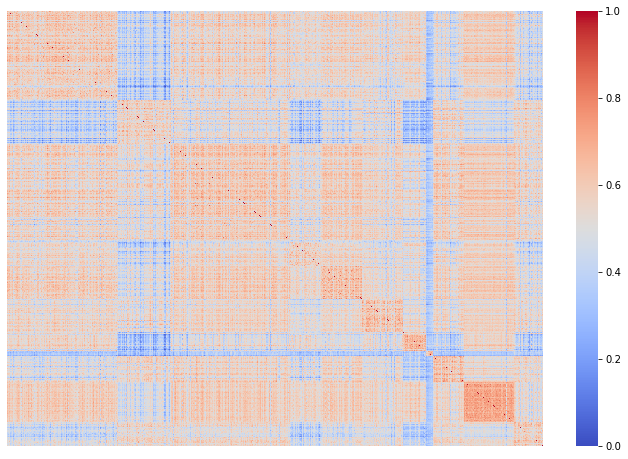

Hierarchical clustering correlation:  0.4064391202837354
CONTINGENCY MATRIX:


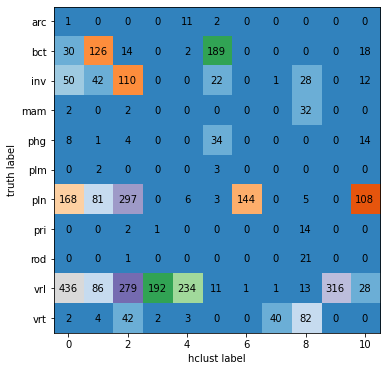

Adj Rand Index:  0.1191
V-measure:  0.3139
Fowlkes-Mallows index:  0.3062
Silhouette score:  0.0496
Hierarchical clustering purity: 0.639668932876234


In [38]:
#evaluation for MinMax
labels = model.labels_
sim = similarity_mat(X_kingdom_mm, 'euclidean')
plot_sorted_sim(sim, y_predict)
print("Hierarchical clustering correlation: ",correlation(X_kingdom_mm,y_predict,metr))

print("CONTINGENCY MATRIX:")
plot_cm(y, labels, label_dict)

print("Adj Rand Index: ",round(metrics.adjusted_rand_score(y, labels),4))
print("V-measure: ",round(metrics.v_measure_score(y, labels),4))
print("Fowlkes-Mallows index: ",round(metrics.fowlkes_mallows_score(y, labels),4))
print("Silhouette score: ",round(metrics.silhouette_score(X_kingdom_mm, labels, metric='euclidean'),4))

print("Hierarchical clustering purity:", tot_purity(y_predict,y))


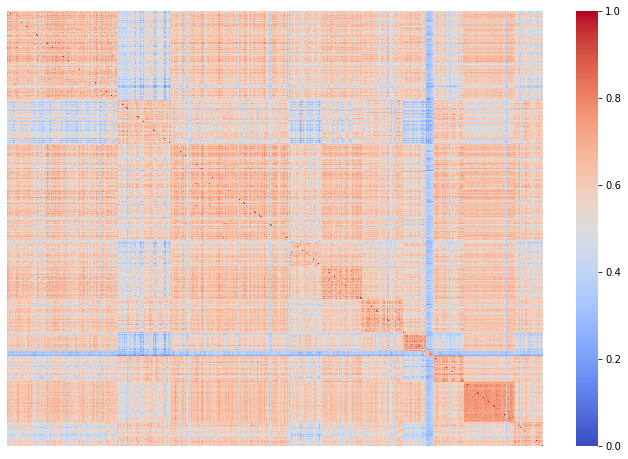

Hierarchical clustering correlation:  0.40289134948867006
CONTINGENCY MATRIX:


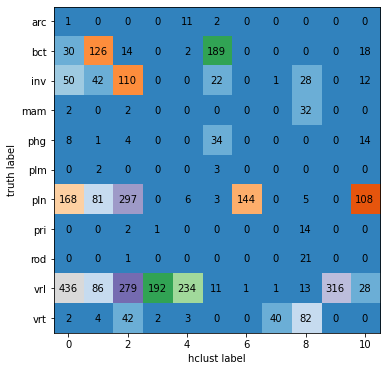

Adj Rand Index:  0.1191
V-measure:  0.3139
Fowlkes-Mallows index:  0.3062
Silhouette score:  0.0665
Hierarchical clustering purity: 0.639668932876234


In [39]:
#evaluation for StandardScaler
labels = model.labels_
sim = similarity_mat(X_kingdom_ss, 'euclidean')
plot_sorted_sim(sim, y_predict)
print("Hierarchical clustering correlation: ",correlation(X_kingdom_ss,y_predict,metr))

print("CONTINGENCY MATRIX:")
plot_cm(y, labels, label_dict)

print("Adj Rand Index: ",round(metrics.adjusted_rand_score(y, labels),4))
print("V-measure: ",round(metrics.v_measure_score(y, labels),4))
print("Fowlkes-Mallows index: ",round(metrics.fowlkes_mallows_score(y, labels),4))
print("Silhouette score: ",round(metrics.silhouette_score(X_kingdom_ss, labels, metric='euclidean'),4))

print("Hierarchical clustering purity:", tot_purity(y_predict,y))


Data produced a slightly different hierarchical clustering as shown in the results.<br>
In general we can say that: 
<ul>
    <li><b>Similarity matrix</b>: it is very difficult to recognize squares that arrange along the diagonal from the plot. <br>
        This result, confirmed also by the low <b>correlation</b> score, underline the fact that clusters are no well-defined as seen previously with the 3D representation. </li>
    <li> <b> Silhouette score </b> is near to zero, meaning that clusters overlap. </li>
    <li> The <b>other results, including the contingency matrix</b>, confirm the fact that <b>hierarchical clustering performed poorerly</b> on our data: it undelined a sort of "pattern" between "vrl", "pln", "inv" and "bct" but nothing else.

<h3> K-means </h3>

K-means is a <b>partitioning clustering</b> algorithm which takes N points(assuming an <i>euclidean space</i>) and split these points in <i><b>k</i></b> clusters such that the intra-cluster distances are minimized and the inter-cluster distances are maximized. <br>
It also assumes that clusters can be summarized by their centroid and so, the points are grouped togheter based on their closest centroid. <br> <br>
Centroids are initialized randomly and the value of <i><b>k</i></b> has to be established a priori; these two aspect combined togheter might affect the clustering results.

Given the fact that we already now how data are labeled, we assume <i><b>k</i></b> = 11 and we perform the inizialization with <code>"k-means++"</code> that produce a better inizialization of the centroids. <br><br>

Since before we obtained almost the same results using different scaled data, from now on clustering analysis will be done using data obtained from <code>StandardScaler</code>.

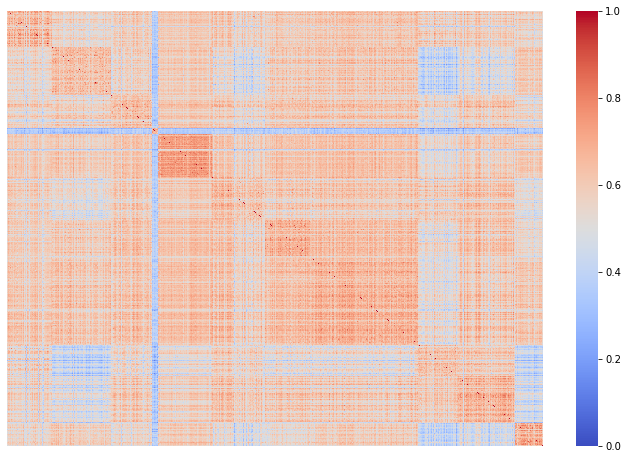

Kmeans++ correlation:  0.3786270893495993
CONTINGENCY MATRIX:


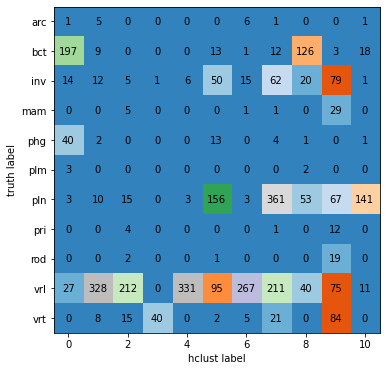

Adj Rand Index:  0.136
V-measure:  0.2992
Fowlkes-Mallows index:  0.3119
Silhouette score:  0.0917
K-means++ clustering purity: 0.6630209872663099


In [40]:
model = KMeans(n_clusters=11, init='k-means++', random_state=0)             
y_predict_km = model.fit_predict(X_kingdom_ss)

labels = model.labels_
sim = similarity_mat(X_kingdom_ss, 'euclidean')
plot_sorted_sim(sim, y_predict_km)
print("Kmeans++ correlation: ",correlation(X_kingdom_ss,y_predict_km,metr))

print("CONTINGENCY MATRIX:")
plot_cm(y, labels, label_dict)

print("Adj Rand Index: ",round(metrics.adjusted_rand_score(y, labels),4))
print("V-measure: ",round(metrics.v_measure_score(y, labels),4))
print("Fowlkes-Mallows index: ",round(metrics.fowlkes_mallows_score(y, labels),4))
print("Silhouette score: ",round(metrics.silhouette_score(X_kingdom_ss, labels, metric='euclidean'),4))
print("K-means++ clustering purity:", tot_purity(y_predict_km,y))

K-means resulting indexes are comparable to the ones obtained with the hierarchical clustering.

In the contingency matrix are present again classes also identified by the hierarchical.<br>

<h3> Clustering improvement </h3>

Since both hierarchical and K-means clustering algorithms did not perform well, we try to use PCA, as a dimensionality-reduction technique, in order to obtain an improvement in the performance measures.


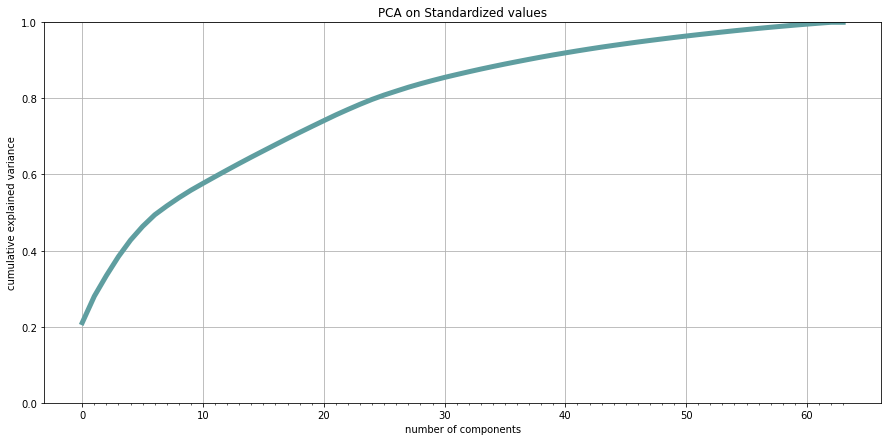

In [41]:
pca = PCA()
X_pca = pca.fit(X_kingdom_ss)
X_prj = pca.fit_transform(X_kingdom_ss)

pca_varexp(X_kingdom_ss, "PCA on Standardized values")

From the plot we can see that most of the variance is explained by the first <b>40</b> PCs, so we try to use only these ones.

In [42]:
model = KMeans(n_clusters=11, init='k-means++', random_state=6,n_init=50) 
keep=40
y_predict_km = model.fit_predict(X_prj[:,0:keep])
print("Kmeans++ purity on 40 PCs:", tot_purity(y_predict_km, y_train))
print("Kmeans++ correlation on 40 PCs: ",correlation(X_prj[:,0:keep],y_predict_km,metr))

Kmeans++ purity on 40 PCs: 0.6594738397645991
Kmeans++ correlation on 40 PCs:  0.37865542143923914


Kmeans++ purity and correlation did not improve,indeed they have gotten worse.

In [43]:
model = AgglomerativeClustering(n_clusters=n_clusters, 
                                distance_threshold=distance_threshold, 
                                affinity=metr, linkage=link)
#cluster labels
y_predict = model.fit_predict(X_prj[:,0:keep])

print("Hierarchical purity on 40 PCs:", tot_purity(y_predict, y))
print("Hierarchical correlation on 40 PCs: ",correlation(X_prj[:,0:keep],y_predict,metr))

Hierarchical purity on 40 PCs: 0.6485368016319981
Hierarchical correlation on 40 PCs:  0.38825474620012546


Also hierarchical clustering did not improve.

<h3> DBSCAN </h3>

DBSCAN is a <b>density based clustering algorithm</b> that are able to discover clusters of arbitrary shapes and handle noise without knowing in advantage the number of clusters.<br>
It works with parameters called <i>eps</i> and <i>min samples</i>. <br> 
Eps represent the maximum radius of the neighborhood of a point whereas min samples is the minimum number of points in the eps defined neighborhood to define a point a core point.<br>

In [44]:
from sklearn.cluster import DBSCAN

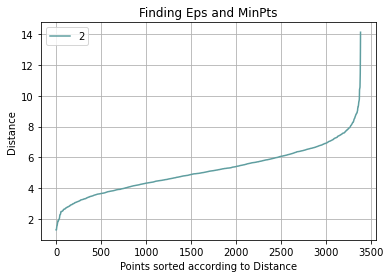

In [45]:
n=2
neigh = NearestNeighbors(n_neighbors=n)
nbrs = neigh.fit(X_kingdom_ss)
distances, indices = nbrs.kneighbors(X_kingdom_ss)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances,label= n, color = "cadetblue")
plt.legend()
plt.grid()
plt.xlabel("Points sorted according to Distance")
plt.ylabel("Distance")
plt.title("Finding Eps and MinPts")
plt.show()

A grid search is performed to find the best eps and min_samples parameters.

In [46]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [47]:
eps=np.arange(1,3,0.5)
s=np.arange(1,3,1)
params = {'eps': eps, 'min_samples': s}

cv = GridSearchCV(DBSCAN(), params, scoring=make_scorer(tot_purity), cv=2,
                 verbose=False, n_jobs=-1)
cv = cv.fit(X_kingdom_ss, y)

In [48]:
print("The best parameters are:",cv.best_params_)
print("The score of this model is:",cv.best_score_)
#pd.DataFrame(cv.cv_results_).sort_values(by="rank_test_score")

The best parameters are: {'eps': 2.5, 'min_samples': 2}
The score of this model is: 0.010345760373200215


In [49]:
#fit the model

DBSCAN purity 0.011232633724504877
DBSCAN correlation:  0.007852057954257828
Number of outliers 3314
Points in each cluster:
   -1    0    1    2    3    4    5    6    7    8   ...   15   16   17   18  \
  3314    2    2    2    2    4    4    4    2    2  ...    2    2    2    2   

   19   20   21   22   23   24  
    2    3    4    2    2    2  

[1 rows x 26 columns]


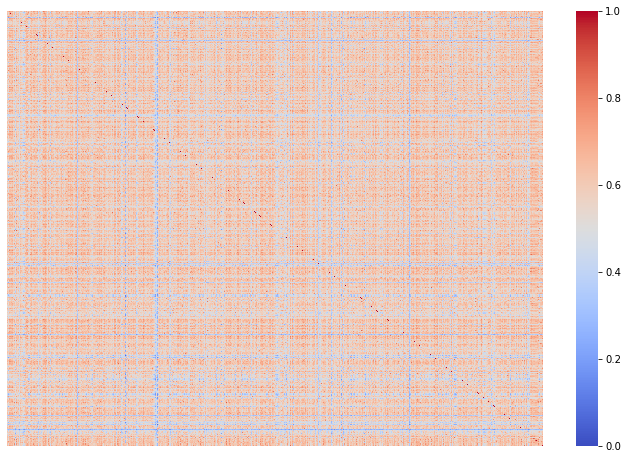

In [50]:
model = DBSCAN(eps=cv.best_params_['eps'], min_samples=cv.best_params_['min_samples'])
y_predict = model.fit_predict(X_kingdom_ss)
print("DBSCAN purity", tot_purity(y_predict, y))
print("DBSCAN correlation: ",correlation(X_kingdom_ss,y_predict,metr))
print("Number of outliers", (y_predict == -1).sum())
ids, counts = np.unique(y_predict, return_counts=True)
print("Points in each cluster:")
print(pd.DataFrame(counts.reshape(1,-1), columns=ids, index=['']))
plot_sorted_sim(sim,y_predict)

DBSCAN did not perform at all in this dataset.

<h1> 2.Classification </h1>

With the aim of classify the organisms based on the eleven different classes (Kingdom), we use supervised learning techniques which assing a label to each sample, starting from the data set.

Two codon frequencies, <b>'AGA' and 'ACA'</b> have been <b>removed</b> from the training set since they are not present in the test set.<br>

Since the initial dataset was very big both in terms of number of samples and in features, the following classification algorithms are trained using a <b>reduced</b> dataset version. <br>
The reduced version was obtained by taking half of the samples from each class randomly. <br>

The dataset that before was used for clustering (deriving from outliers removal) has not been used in the following points because it has been seen that, compared with the result obtained using the complet dataset, it performed much less. <br>
This reduced version instead has maintaned high levels of accuracy if compared with the ones obtained from the entire dataset.

Of course this solution of reducing the number of samples can be avoided and analyses can be made with the complete dataset, here is used the reduced version for brevity reasons. 

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, plot_confusion_matrix, accuracy_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from numpy import mean
from numpy import std
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [52]:
#import the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train = train.drop(["Unnamed: 0", "SpeciesID", "Ncodons", "SpeciesName", "DNAtype"], axis=1)
test = test.drop(["Unnamed: 0", "SpeciesID", "Ncodons", "SpeciesName", "DNAtype"], axis=1)


##Sub-sampling to speed up algorithm
sub_train = pd.DataFrame()

for k in train.Kingdom.unique():
    d = train[train.Kingdom == k]
    if d.shape[0] > 99:
        halfd = d.sample(frac=0.50)
        sub_train = pd.concat([sub_train,halfd])
    else:
        sub_train = pd.concat([sub_train,d])

sub_train.shape
train= sub_train.copy()
#print(train)

train['Kingdom'] = pd.Categorical(train['Kingdom'])
test['Kingdom'] = pd.Categorical(test['Kingdom'])

X = np.array(train.drop('Kingdom', axis=1)) #the floating point values
y = np.array(train['Kingdom'].cat.codes) #unsigned integers specifying group
y_cat = np.array(train['Kingdom'])

label_dict = { np.unique(y)[k] : np.unique(y_cat)[k] 
              for k in range(len(np.unique(y_cat)))}

train2 = train.drop(["ACA", "AGA"], axis=1)
X_2 = np.array(train2.drop('Kingdom', axis=1))
y_2 = np.array(train2['Kingdom'].cat.codes) #unsigned integers specifying group
y_2_cat = np.array(train2['Kingdom'])

X_test = np.array(test.drop('Kingdom', axis=1))
y_test = np.array(test['Kingdom'].cat.codes)
y_test_cat = np.array(test['Kingdom'])

In the following section of code, we optimize the KNN parameters:
- n_neighbors which is k;
- p which is the power parameter of the minkowski metric.

The weights parameter can be uniform if all points in the neighborhood are weighted equally or distance if it weighs closer neighbors more heavily than further neighbors.

In [53]:
parameters_KNN = {
    'n_neighbors': list(range(5,20)),
    'p': (1,2,3,4),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski','cosine')
}

scaler = MinMaxScaler()
knn = KNeighborsClassifier()

# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=knn,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

pipe = Pipeline(steps=[('scaler', scaler),('m',grid_search_KNN)])

pipe.fit(X_2, y_2)
print("The best parametrs are the follwoing:\n",grid_search_KNN.best_params_ ) 
print('\nBest Score - KNN:', grid_search_KNN.best_score_ )
params = grid_search_KNN.best_params_

The best parametrs are the follwoing:
 {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Best Score - KNN: 0.8662074843051469


We have tested two different kernel functions for the SVM algorithm:
- Linear;
- Polynomial.

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
****Results****
Accuracy: 78.6262%
              precision    recall  f1-score   support

           0       0.58      0.28      0.38        25
           1       0.85      0.95      0.89       584
           2       0.71      0.48      0.58       269
           3       0.77      0.63      0.70       114
           4       1.00      0.11      0.20        44
           5       0.00      0.00      0.00         4
           6       0.76      0.79      0.77       505
           7       0.00      0.00      0.00        36
           8       1.00      0.19      0.31        43
           9       0.77      0.89      0.83       567
          10       0.78      0.89      0.83       415

    accuracy                           0.79      2606
   macro avg       0.66      0.47      0.50      2606
weighted avg       0.78      0.79      0.77      2606



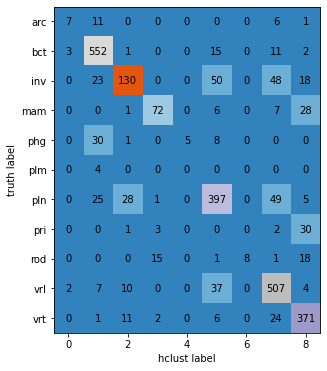

SVC
****Results****
Accuracy: 81.4658%
              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.87      0.95      0.90       584
           2       0.75      0.56      0.64       269
           3       0.68      0.72      0.70       114
           4       0.79      0.25      0.38        44
           5       0.00      0.00      0.00         4
           6       0.81      0.82      0.81       505
           7       1.00      0.03      0.05        36
           8       0.88      0.16      0.27        43
           9       0.82      0.90      0.86       567
          10       0.81      0.92      0.86       415

    accuracy                           0.81      2606
   macro avg       0.74      0.53      0.56      2606
weighted avg       0.81      0.81      0.80      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


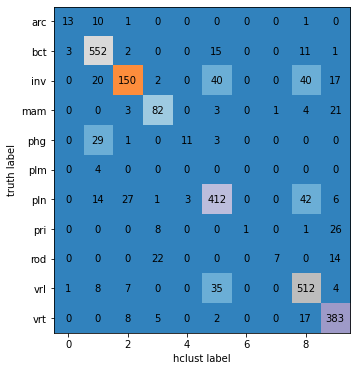

SVC
****Results****
Accuracy: 89.1788%
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        25
           1       0.91      0.95      0.93       584
           2       0.84      0.77      0.80       269
           3       0.76      0.81      0.78       114
           4       0.78      0.57      0.66        44
           5       0.00      0.00      0.00         4
           6       0.93      0.88      0.90       505
           7       0.71      0.69      0.70        36
           8       0.81      0.58      0.68        43
           9       0.90      0.94      0.92       567
          10       0.93      0.96      0.95       415

    accuracy                           0.89      2606
   macro avg       0.75      0.71      0.73      2606
weighted avg       0.89      0.89      0.89      2606



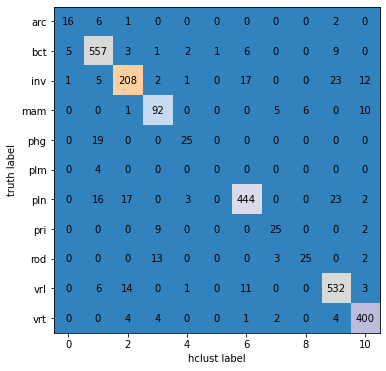

KNeighborsClassifier
****Results****
Accuracy: 84.2287%
              precision    recall  f1-score   support

           0       0.75      0.48      0.59        25
           1       0.84      0.95      0.89       584
           2       0.87      0.59      0.71       269
           3       0.62      0.84      0.71       114
           4       0.77      0.52      0.62        44
           5       0.00      0.00      0.00         4
           6       0.82      0.89      0.85       505
           7       0.44      0.31      0.36        36
           8       0.78      0.42      0.55        43
           9       0.91      0.85      0.88       567
          10       0.89      0.94      0.91       415

    accuracy                           0.84      2606
   macro avg       0.70      0.62      0.64      2606
weighted avg       0.84      0.84      0.84      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


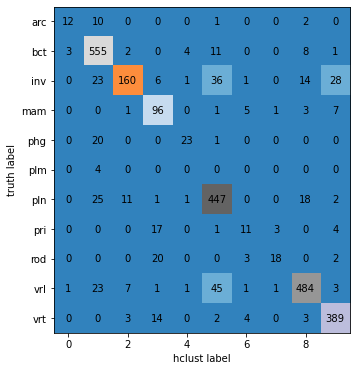

KNeighborsClassifier
****Results****
Accuracy: 88.1427%
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        25
           1       0.89      0.96      0.92       584
           2       0.88      0.68      0.77       269
           3       0.73      0.84      0.78       114
           4       0.86      0.68      0.76        44
           5       0.00      0.00      0.00         4
           6       0.87      0.90      0.89       505
           7       0.64      0.50      0.56        36
           8       0.73      0.63      0.68        43
           9       0.93      0.91      0.92       567
          10       0.90      0.96      0.93       415

    accuracy                           0.88      2606
   macro avg       0.74      0.69      0.71      2606
weighted avg       0.88      0.88      0.88      2606



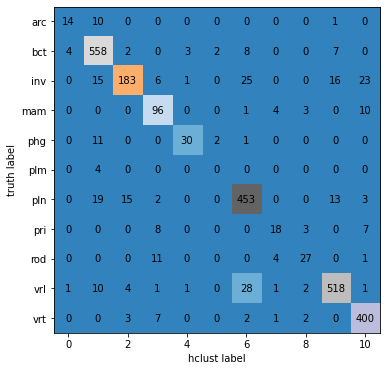

LinearDiscriminantAnalysis
****Results****
Accuracy: 79.0100%
              precision    recall  f1-score   support

           0       0.42      0.60      0.49        25
           1       0.89      0.91      0.90       584
           2       0.63      0.54      0.58       269
           3       0.77      0.67      0.71       114
           4       0.66      0.66      0.66        44
           5       0.14      0.25      0.18         4
           6       0.78      0.78      0.78       505
           7       0.30      0.44      0.36        36
           8       0.63      0.56      0.59        43
           9       0.79      0.89      0.84       567
          10       0.90      0.78      0.84       415

    accuracy                           0.79      2606
   macro avg       0.63      0.64      0.63      2606
weighted avg       0.79      0.79      0.79      2606



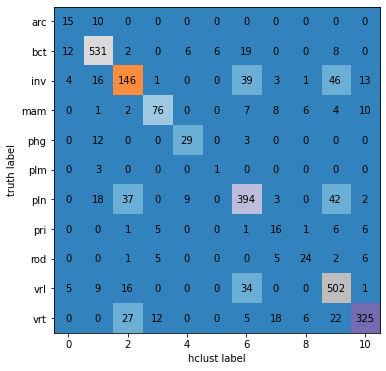

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 80.9286%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.90      0.93      0.92       584
           2       0.61      0.64      0.63       269
           3       0.73      0.79      0.76       114
           4       0.96      0.52      0.68        44
           5       0.00      0.00      0.00         4
           6       0.84      0.73      0.78       505
           7       0.00      0.00      0.00        36
           8       1.00      0.07      0.13        43
           9       0.78      0.95      0.86       567
          10       0.84      0.88      0.86       415

    accuracy                           0.81      2606
   macro avg       0.61      0.50      0.51      2606
weighted avg       0.80      0.81      0.79      2606



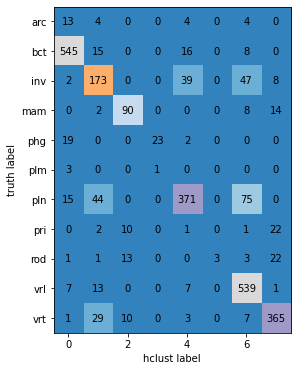

In [57]:
models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='poly'),
          KNeighborsClassifier(n_neighbors=10),
          KNeighborsClassifier(**params),
          LinearDiscriminantAnalysis(store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True)]

#cols=["Classifier", "Accuracy"]
whole_class = []
for model in models:
    clf = Pipeline(steps=[('scaler', scaler),('m',model)])
    clf.fit(X_2, y_2)
    name = model.__class__.__name__
    print("="*60)
    print(name)
    print('****Results****')
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    whole_class.append(acc)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, test_predictions))
    plot_cm(y_test, test_predictions, label_dict)
    plt.show()
    #entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    
print("="*60)

The SVC Polynomial algorithm had the highest accuracy (89.4091%) compared to the other algorithms. <br>

Futhermore, the SVC linear algorithm has a lower accuracy (81.7345%) compared to the Polynomial one.<br> 

The KNeighborsClassifier algorithm with default parameters had a lower accuracy (83.7299%) compared to the KNeighborClassifier algorithm with optimized parameters, which had the second highest accuracy (88.1044%). <br>

The QuadraticDiscriminantAnalysis has a slightly higher accuracy (80.2379%) compared to the linear one (78.9332%). <br>
Finally, the Logistic Regression algorithm had the lowest accuracy (78.8949%)

In the following section, we have tested the same models without the highly correlated features  (|r| > 0.6). <br>
This threshold is chosen because from the correlation matrix plotted at the beginning we noticed that the features do not reach high correlation values. <br>
Setting a thresholf should improve the accuracy of the QuadraticDiscriminantAnalysis algorithm, since correlated features cause multicollinearity that can lead to less precise estimates.

In [58]:
# drop 1 of 2 highly correlated features

print(X_2.shape)

X_2_df = train2.drop('Kingdom', axis=1)
corr = X_2_df.corr()

#Generalmente il threshold dovrebbe essere più alto. Tuttavia, avendo già in precedenza
# fatto la matrice di correlazione e avendo visto che i valori più correlati non superavano lo 0.75
# è stata abbassata la soglia a 0.6
threshold = 0.6 

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= threshold:
            if columns[j]:
                columns[j] = False                
selected_columns = X_2_df.columns[columns]
removed_columns = X_2_df.columns[~columns]
print("removed:", list(removed_columns))

train2_nocor = train2[selected_columns]
train2_class_nocor = train2.drop(removed_columns, axis=1)
test2_nocor = test[selected_columns]
print(train2_nocor.shape)

X_2_nocorr = np.array(train2_nocor)

(5217, 62)
removed: ['AUU', 'AUC', 'AUA', 'GUC', 'GUG', 'GCC', 'GCG', 'CCC', 'CCA', 'CCG', 'GGC', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'ACG', 'UAU', 'CAG', 'AAU', 'CAU', 'CAC', 'AAA', 'AAG', 'CGG', 'GAU', 'GAA', 'GAG', 'UGA']
(5217, 33)


Twentyseven (27) codon frequencies have been removed from the dataset.

In [59]:
pipe = Pipeline(steps=[('scaler', scaler),('m',grid_search_KNN)])
pipe.fit(X_2_nocorr, y_2)

print(grid_search_KNN.best_params_ ) 
print('Best Score - KNN:', grid_search_KNN.best_score_ )

params = grid_search_KNN.best_params_
knn_opt = KNeighborsClassifier(**params)

{'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.8025677477656187


C:\Users\eleon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
LogisticRegression
Accuracy: 69.5702%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.81      0.93      0.86       584
           2       0.61      0.35      0.44       269
           3       0.52      0.28      0.37       114
           4       0.33      0.02      0.04        44
           5       0.00      0.00      0.00         4
           6       0.66      0.67      0.67       505
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        43
           9       0.65      0.81      0.72       567
          10       0.69      0.83      0.76       415

    accuracy                           0.70      2606
   macro avg       0.39      0.35      0.35      2606
weighted avg       0.65      0.70      0.66      2606



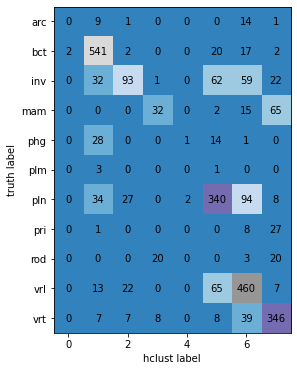

------------------------------------------------------------
SVC
Accuracy: 72.5249%
              precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.81      0.93      0.87       584
           2       0.68      0.36      0.47       269
           3       0.57      0.36      0.44       114
           4       1.00      0.09      0.17        44
           5       0.00      0.00      0.00         4
           6       0.70      0.71      0.70       505
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        43
           9       0.70      0.83      0.76       567
          10       0.71      0.88      0.78       415

    accuracy                           0.73      2606
   macro avg       0.53      0.40      0.42      2606
weighted avg       0.70      0.73      0.70      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


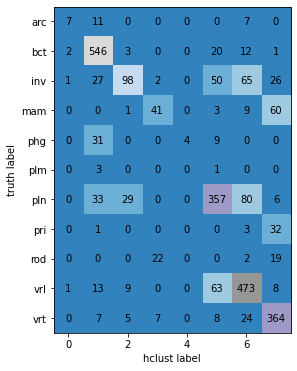

------------------------------------------------------------
SVC
Accuracy: 83.5764%
              precision    recall  f1-score   support

           0       0.48      0.56      0.52        25
           1       0.87      0.95      0.91       584
           2       0.76      0.65      0.70       269
           3       0.67      0.75      0.71       114
           4       0.68      0.59      0.63        44
           5       0.00      0.00      0.00         4
           6       0.86      0.81      0.84       505
           7       0.62      0.42      0.50        36
           8       0.68      0.44      0.54        43
           9       0.86      0.88      0.87       567
          10       0.87      0.90      0.89       415

    accuracy                           0.84      2606
   macro avg       0.67      0.63      0.65      2606
weighted avg       0.83      0.84      0.83      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


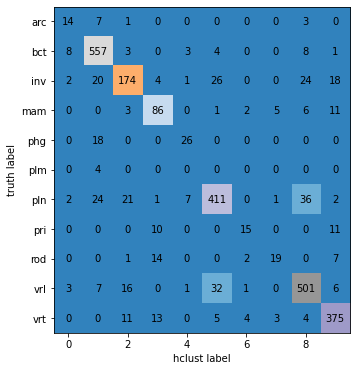

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 76.5925%
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        25
           1       0.78      0.93      0.85       584
           2       0.76      0.44      0.56       269
           3       0.52      0.81      0.63       114
           4       0.76      0.36      0.49        44
           5       0.00      0.00      0.00         4
           6       0.78      0.78      0.78       505
           7       0.38      0.17      0.23        36
           8       0.61      0.26      0.36        43
           9       0.79      0.80      0.80       567
          10       0.84      0.84      0.84       415

    accuracy                           0.77      2606
   macro avg       0.62      0.52      0.54      2606
weighted avg       0.76      0.77      0.75      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


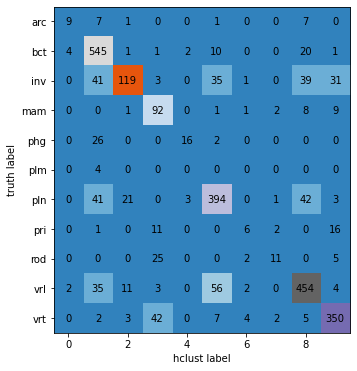

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 81.2356%
              precision    recall  f1-score   support

           0       0.69      0.44      0.54        25
           1       0.82      0.95      0.88       584
           2       0.85      0.50      0.63       269
           3       0.59      0.78      0.67       114
           4       0.70      0.59      0.64        44
           5       0.00      0.00      0.00         4
           6       0.84      0.82      0.83       505
           7       0.35      0.25      0.29        36
           8       0.79      0.44      0.57        43
           9       0.85      0.86      0.85       567
          10       0.82      0.89      0.86       415

    accuracy                           0.81      2606
   macro avg       0.66      0.59      0.62      2606
weighted avg       0.81      0.81      0.80      2606



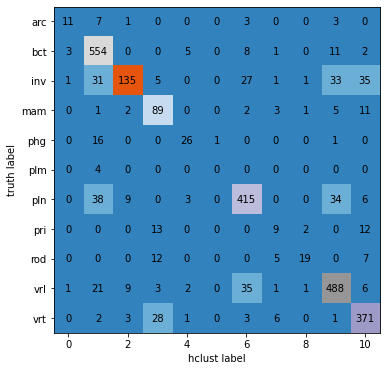

------------------------------------------------------------
LinearDiscriminantAnalysis
Accuracy: 68.8795%
              precision    recall  f1-score   support

           0       0.36      0.56      0.44        25
           1       0.82      0.86      0.84       584
           2       0.53      0.39      0.45       269
           3       0.62      0.60      0.61       114
           4       0.29      0.39      0.33        44
           5       0.00      0.00      0.00         4
           6       0.64      0.66      0.65       505
           7       0.22      0.17      0.19        36
           8       0.65      0.30      0.41        43
           9       0.66      0.77      0.71       567
          10       0.84      0.72      0.77       415

    accuracy                           0.69      2606
   macro avg       0.51      0.49      0.49      2606
weighted avg       0.69      0.69      0.68      2606



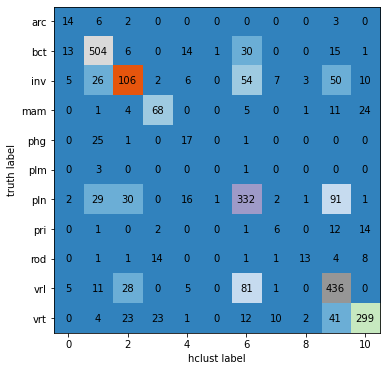

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
QuadraticDiscriminantAnalysis
Accuracy: 75.1343%
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.84      0.90      0.87       584
           2       0.50      0.52      0.51       269
           3       0.62      0.79      0.69       114
           4       0.87      0.61      0.72        44
           5       0.00      0.00      0.00         4
           6       0.79      0.59      0.68       505
           7       0.62      0.42      0.50        36
           8       0.72      0.49      0.58        43
           9       0.70      0.90      0.79       567
          10       0.91      0.79      0.84       415

    accuracy                           0.75      2606
   macro avg       0.69      0.56      0.59      2606
weighted avg       0.76      0.75      0.75      2606



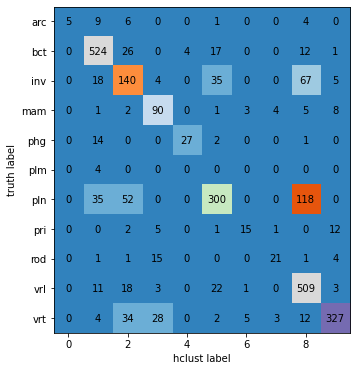

------------------------------------------------------------


In [60]:
models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='poly'),
          KNeighborsClassifier(n_neighbors=10),
          KNeighborsClassifier(**params),
          LinearDiscriminantAnalysis(store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True)]

#cols=["Classifier", "Accuracy"]
no_corr_class = []
for model in models:
    clf = Pipeline(steps=[('scaler', scaler),('m',model)])
    clf.fit(X_2_nocorr, y_2)
    name = model.__class__.__name__
    print("-"*60)
    print(name)
    test_predictions = clf.predict(test2_nocor)
    acc = accuracy_score(y_test, test_predictions)
    no_corr_class.append(acc)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, test_predictions))
    plot_cm(y_test, test_predictions, label_dict)
    plt.show()
    #entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    
print("-"*60)

However, there have not been improved the accuracy of the different models.

<h2> Feature selection </h2>

Feature selection can create accurate models by selecting important and informative features by removing redundant one that may decrease the accuracy of the model. Moreover, it reduces the complexity of the model.

<h3> Univariate feature selection </h3>

Univariate feature selection assesses each feature in order to determine the features which have the strongest relationship with the response variable. They assess each feature independently from the others and this could cause redundant features to be selected as they don't consider interaction between variables.

In the following section, through the scikit implementation of the f-classif scorer, we perform an ANOVA test for each variable. The results of this test is the F-value which basically explicit how the means of the numerical feature differs for each group. We start by using all the features and selecting the features with an f-score greater than the 75th percentile.

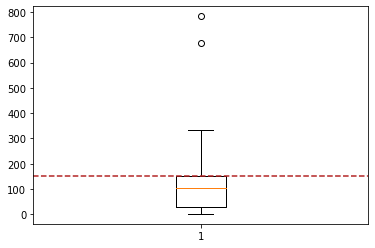

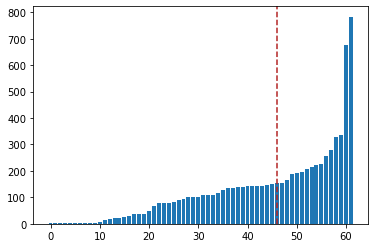

Original number of features: 62
Reduced number of features: 16
Index(['UUC', 'UUG', 'CUA', 'AUC', 'GCG', 'CCA', 'CCG', 'UGG', 'UCU', 'UCC',
       'ACG', 'UGU', 'CGU', 'AGG', 'GAU', 'UGA'],
      dtype='object')
(5217, 16)


In [61]:
#ANOVA feature selection for numeric input and categorical output
fs = SelectKBest(score_func=f_classif, k='all')

fs.fit(X_2, y_2)
X_train_fs = fs.transform(X_2)

# transform test input data
# what are scores for the features
max_score = np.percentile(fs.scores_, 75) 
k = sum(fs.scores_ > max_score)

plt.boxplot(fs.scores_)
plt.axhline(y=max_score, color = "firebrick", linestyle = "dashed")
plt.show()
plt.bar([i for i in range(len(fs.scores_))], np.sort(fs.scores_))
plt.axvline(x=fs.scores_.shape[0]-k, color = "firebrick", linestyle = "dashed")
plt.show()

# define feature selection
fs = SelectKBest(score_func=f_classif, k=k)
# apply feature selection
X_selected_fs = fs.fit_transform(X_2, y)

# Show results
print('Original number of features:', X_2.shape[1])
print('Reduced number of features:', X_selected_fs.shape[1])

mask = fs.get_support()
features_f = X_2_df.columns[mask]
print(features_f)
print(X_selected_fs.shape)
#The F-value scores examine if, when we group the numerical
#feature by the target vector, the means for each group are significantly different.

In this case sixteen (16) codons were selected. Subsequently, we performed the same classification pipeline as before.

In [62]:
pipe = Pipeline(steps=[('scaler', scaler),('m',grid_search_KNN)])
pipe.fit(X_selected_fs, y)

print(grid_search_KNN.best_params_ ) 
print('Best Score - KNN:', grid_search_KNN.best_score_ )

params = grid_search_KNN.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.8012304250559283


C:\Users\eleon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
LogisticRegression
Accuracy: 65.8097%
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        25
           1       0.76      0.91      0.83       584
           2       0.59      0.25      0.35       269
           3       0.21      0.03      0.05       114
           4       0.00      0.00      0.00        44
           5       0.00      0.00      0.00         4
           6       0.65      0.63      0.64       505
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        43
           9       0.61      0.80      0.69       567
          10       0.64      0.81      0.71       415

    accuracy                           0.66      2606
   macro avg       0.37      0.32      0.31      2606
weighted avg       0.61      0.66      0.61      2606



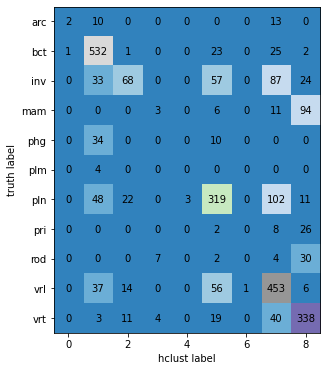

------------------------------------------------------------
SVC
Accuracy: 66.6539%


C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.78      0.92      0.84       584
           2       0.67      0.21      0.32       269
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00        44
           5       0.00      0.00      0.00         4
           6       0.62      0.67      0.64       505
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        43
           9       0.62      0.80      0.70       567
          10       0.64      0.84      0.73       415

    accuracy                           0.67      2606
   macro avg       0.30      0.31      0.29      2606
weighted avg       0.60      0.67      0.61      2606



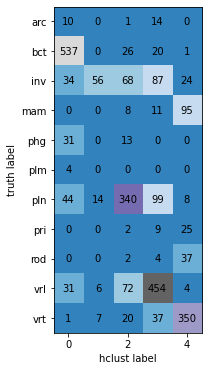

------------------------------------------------------------
SVC
Accuracy: 79.6239%
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        25
           1       0.85      0.93      0.89       584
           2       0.69      0.60      0.64       269
           3       0.73      0.63      0.68       114
           4       0.88      0.50      0.64        44
           5       0.00      0.00      0.00         4
           6       0.79      0.76      0.77       505
           7       0.47      0.19      0.27        36
           8       0.94      0.35      0.51        43
           9       0.79      0.86      0.82       567
          10       0.81      0.89      0.85       415

    accuracy                           0.80      2606
   macro avg       0.70      0.56      0.60      2606
weighted avg       0.79      0.80      0.79      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


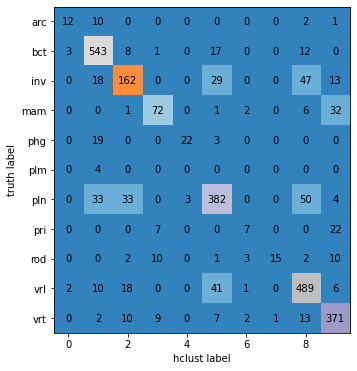

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 78.3576%
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        25
           1       0.80      0.94      0.86       584
           2       0.74      0.51      0.61       269
           3       0.64      0.67      0.65       114
           4       0.79      0.52      0.63        44
           5       0.00      0.00      0.00         4
           6       0.77      0.78      0.78       505
           7       0.35      0.22      0.27        36
           8       0.63      0.28      0.39        43
           9       0.81      0.83      0.82       567
          10       0.83      0.86      0.85       415

    accuracy                           0.78      2606
   macro avg       0.63      0.55      0.57      2606
weighted avg       0.78      0.78      0.77      2606



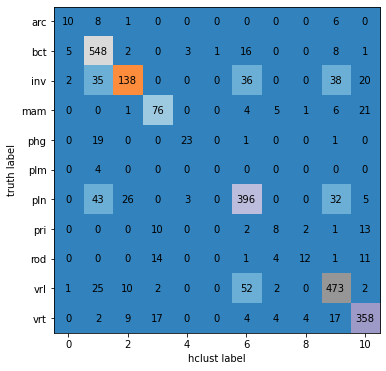

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 81.7345%
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        25
           1       0.84      0.94      0.89       584
           2       0.74      0.57      0.64       269
           3       0.69      0.73      0.71       114
           4       0.82      0.64      0.72        44
           5       0.00      0.00      0.00         4
           6       0.81      0.80      0.80       505
           7       0.53      0.44      0.48        36
           8       0.61      0.47      0.53        43
           9       0.86      0.87      0.87       567
          10       0.85      0.90      0.87       415

    accuracy                           0.82      2606
   macro avg       0.68      0.63      0.65      2606
weighted avg       0.81      0.82      0.81      2606



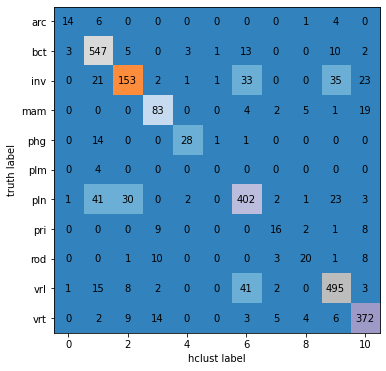

------------------------------------------------------------
LinearDiscriminantAnalysis
Accuracy: 64.7352%
              precision    recall  f1-score   support

           0       0.28      0.44      0.34        25
           1       0.80      0.88      0.84       584
           2       0.47      0.31      0.37       269
           3       0.44      0.23      0.30       114
           4       0.29      0.27      0.28        44
           5       0.00      0.00      0.00         4
           6       0.65      0.60      0.63       505
           7       0.00      0.00      0.00        36
           8       0.48      0.37      0.42        43
           9       0.59      0.77      0.66       567
          10       0.71      0.69      0.70       415

    accuracy                           0.65      2606
   macro avg       0.43      0.41      0.41      2606
weighted avg       0.63      0.65      0.63      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


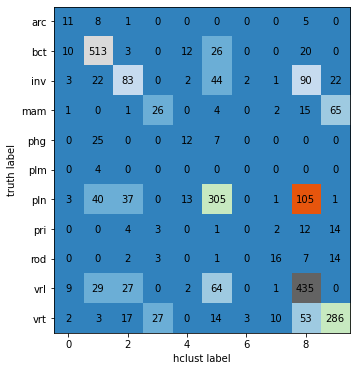

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
QuadraticDiscriminantAnalysis
Accuracy: 69.2249%
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        25
           1       0.81      0.85      0.83       584
           2       0.62      0.41      0.49       269
           3       0.48      0.78      0.59       114
           4       0.67      0.68      0.67        44
           5       0.00      0.00      0.00         4
           6       0.67      0.56      0.61       505
           7       0.54      0.36      0.43        36
           8       0.56      0.42      0.48        43
           9       0.62      0.87      0.73       567
          10       0.89      0.61      0.72       415

    accuracy                           0.69      2606
   macro avg       0.58      0.57      0.56      2606
weighted avg       0.71      0.69      0.69      2606



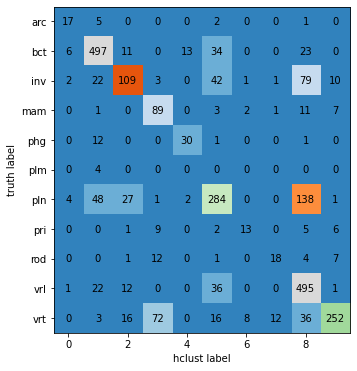

------------------------------------------------------------


In [63]:
X_test_fs = test[features_f]

models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='poly'),
          KNeighborsClassifier(n_neighbors=10),
          KNeighborsClassifier(**params),
          LinearDiscriminantAnalysis(store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True)]

#cols=["Classifier", "Accuracy"]
univ_class = []
for model in models:
    clf = Pipeline(steps=[('scaler', scaler),('m',model)])
    clf.fit(X_selected_fs, y_2)
    name = model.__class__.__name__
    
    print("-"*60)
    print(name)
      
    test_predictions = clf.predict(X_test_fs)
    acc = accuracy_score(y_test, test_predictions)
    univ_class.append(acc)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, test_predictions))
    test_predictions = clf.predict(X_test_fs)
    plot_cm(y_test, test_predictions, label_dict)
    plt.show()
    #entry = pd.DataFrame([[name, acc*100]], columns=cols)
    
print("-"*60)

The univariate feature selection did not improve the accuracy in any of the method used in the classification.

### Recursive feature elimination

The recursive feature elimination is a feature selection model that fits a model and removes recursively the weakest features until the specified number of features is reached. This method requires a specified number of features to keep. In order to identify the optimal number of features, we have used the cross-validation to score different feature subsets and select the best scoring collection of features.

Optimal number of features : 61


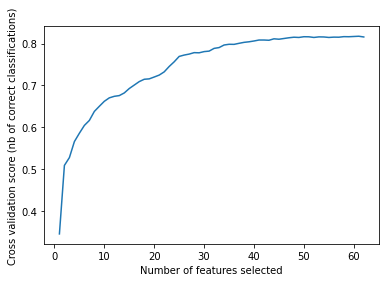

Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACG', 'UAU', 'UAC', 'CAA',
       'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU',
       'CGC', 'CGA', 'CGG', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG',
       'UGA'],
      dtype='object')


In [64]:
# recursive
# pipeline = Pipeline(steps=[('scaler', StandardScaler()),('svc', model)])
model = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')

pipeline = Pipeline(steps=[('scaler', scaler),('s',rfecv),('m',model)])

pipeline.fit(X_2, y_2)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

mask = rfecv.get_support()
features_rfe = X_2_df.columns[mask]
print(features_rfe)

In [65]:
a = set(features_rfe)
b = set(features_f)

print("Union: ", len(a|b))
print("Intersection: ", len(a & b))
print("Intersection: ", a & b)
      
print("Difference rfe-univ: ", len(a - b))
print("Difference rfe-univ: ", a - b)

print("Difference: univ-rfe", len(b - a))
print("Difference: univ-rfe", (b - a))

Union:  61
Intersection:  16
Intersection:  {'CCG', 'UCC', 'ACG', 'UUC', 'UGG', 'CUA', 'AGG', 'UGA', 'GCG', 'CCA', 'GAU', 'UUG', 'UGU', 'AUC', 'CGU', 'UCU'}
Difference rfe-univ:  45
Difference rfe-univ:  {'UUU', 'UCA', 'CUG', 'AGC', 'CGC', 'AUU', 'CAG', 'CUC', 'GUC', 'CCU', 'AGU', 'GUA', 'UAC', 'GAC', 'UAA', 'GGC', 'GGU', 'CAA', 'GAG', 'ACU', 'AUA', 'GUU', 'UCG', 'GCA', 'UAG', 'UUA', 'CAU', 'AAC', 'ACC', 'GGA', 'CAC', 'AAA', 'AAG', 'CGA', 'GCC', 'UAU', 'GAA', 'CGG', 'AAU', 'CCC', 'UGC', 'CUU', 'AUG', 'GUG', 'GGG'}
Difference: univ-rfe 0
Difference: univ-rfe set()


In the following sections, we have trained the models with the RFE features identified before.


In [66]:
X_test_rfe = test[features_rfe]
print(X_test_rfe.shape)
# X_selected.shape
X_selected_rfe = train2[features_rfe]
print(X_selected_rfe.shape)

(2606, 61)
(5217, 61)


In [67]:
pipe = Pipeline(steps=[('scaler', scaler),('m',grid_search_KNN)])
pipe.fit(X_selected_rfe, y_2)

print(grid_search_KNN.best_params_) 
print('Best Score - KNN:', grid_search_KNN.best_score_ )

params = grid_search_KNN.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.8667825642947143


C:\Users\eleon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
LogisticRegression
Accuracy: 78.4728%
              precision    recall  f1-score   support

           0       0.60      0.24      0.34        25
           1       0.85      0.95      0.89       584
           2       0.72      0.48      0.58       269
           3       0.76      0.61      0.67       114
           4       1.00      0.11      0.20        44
           5       0.00      0.00      0.00         4
           6       0.76      0.79      0.78       505
           7       0.00      0.00      0.00        36
           8       1.00      0.19      0.31        43
           9       0.77      0.90      0.83       567
          10       0.77      0.89      0.83       415

    accuracy                           0.78      2606
   macro avg       0.66      0.47      0.49      2606
weighted avg       0.77      0.78      0.76      2606



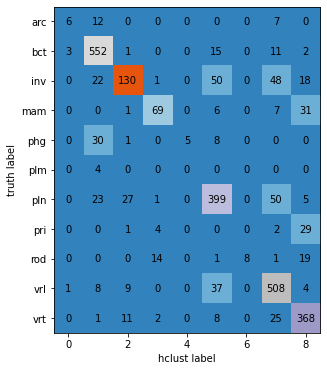

------------------------------------------------------------
SVC
Accuracy: 81.5042%
              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.86      0.95      0.90       584
           2       0.74      0.55      0.63       269
           3       0.69      0.72      0.70       114
           4       0.92      0.25      0.39        44
           5       0.00      0.00      0.00         4
           6       0.81      0.81      0.81       505
           7       1.00      0.03      0.05        36
           8       0.88      0.16      0.27        43
           9       0.82      0.91      0.86       567
          10       0.82      0.93      0.87       415

    accuracy                           0.82      2606
   macro avg       0.75      0.53      0.56      2606
weighted avg       0.82      0.82      0.80      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


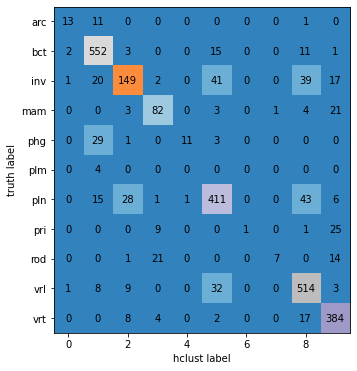

------------------------------------------------------------
SVC
Accuracy: 89.2556%
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        25
           1       0.90      0.96      0.93       584
           2       0.83      0.77      0.80       269
           3       0.75      0.83      0.79       114
           4       0.81      0.59      0.68        44
           5       0.00      0.00      0.00         4
           6       0.93      0.88      0.90       505
           7       0.72      0.64      0.68        36
           8       0.86      0.58      0.69        43
           9       0.90      0.94      0.92       567
          10       0.93      0.96      0.95       415

    accuracy                           0.89      2606
   macro avg       0.76      0.71      0.73      2606
weighted avg       0.89      0.89      0.89      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


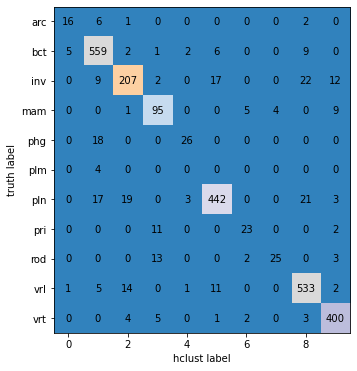

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 84.5741%
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        25
           1       0.85      0.96      0.90       584
           2       0.85      0.60      0.70       269
           3       0.62      0.80      0.70       114
           4       0.80      0.55      0.65        44
           5       0.00      0.00      0.00         4
           6       0.82      0.90      0.86       505
           7       0.38      0.25      0.30        36
           8       0.81      0.40      0.53        43
           9       0.93      0.85      0.89       567
          10       0.89      0.94      0.91       415

    accuracy                           0.85      2606
   macro avg       0.70      0.61      0.64      2606
weighted avg       0.85      0.85      0.84      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


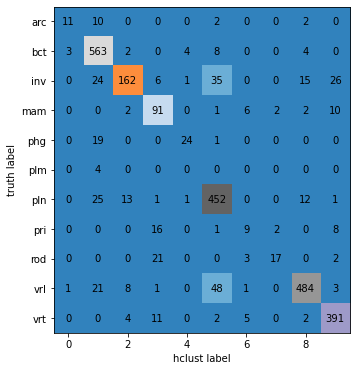

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 88.6032%
              precision    recall  f1-score   support

           0       0.72      0.52      0.60        25
           1       0.89      0.96      0.93       584
           2       0.90      0.69      0.78       269
           3       0.73      0.83      0.78       114
           4       0.85      0.77      0.81        44
           5       0.00      0.00      0.00         4
           6       0.88      0.91      0.89       505
           7       0.64      0.50      0.56        36
           8       0.76      0.60      0.68        43
           9       0.94      0.92      0.93       567
          10       0.90      0.96      0.93       415

    accuracy                           0.89      2606
   macro avg       0.75      0.70      0.72      2606
weighted avg       0.88      0.89      0.88      2606



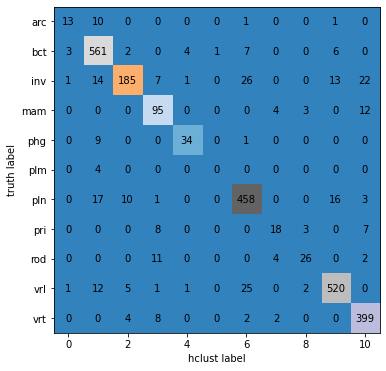

------------------------------------------------------------
LinearDiscriminantAnalysis
Accuracy: 78.6646%
              precision    recall  f1-score   support

           0       0.38      0.60      0.47        25
           1       0.88      0.91      0.89       584
           2       0.63      0.53      0.57       269
           3       0.76      0.67      0.71       114
           4       0.65      0.68      0.67        44
           5       0.14      0.25      0.18         4
           6       0.78      0.77      0.77       505
           7       0.30      0.44      0.36        36
           8       0.62      0.56      0.59        43
           9       0.79      0.89      0.84       567
          10       0.91      0.78      0.84       415

    accuracy                           0.79      2606
   macro avg       0.62      0.64      0.63      2606
weighted avg       0.79      0.79      0.79      2606



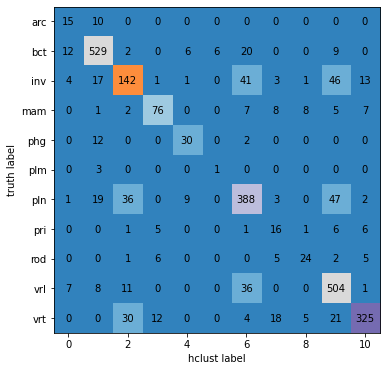

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
QuadraticDiscriminantAnalysis
Accuracy: 80.9286%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.90      0.93      0.91       584
           2       0.60      0.65      0.62       269
           3       0.75      0.80      0.77       114
           4       0.92      0.52      0.67        44
           5       0.00      0.00      0.00         4
           6       0.84      0.73      0.78       505
           7       0.00      0.00      0.00        36
           8       1.00      0.14      0.24        43
           9       0.78      0.95      0.86       567
          10       0.85      0.88      0.87       415

    accuracy                           0.81      2606
   macro avg       0.60      0.51      0.52      2606
weighted avg       0.80      0.81      0.79      2606



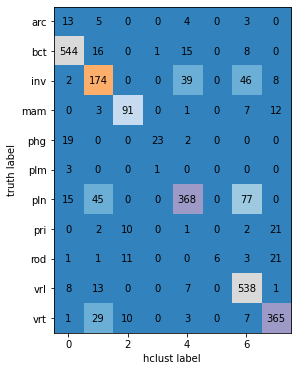

------------------------------------------------------------


In [68]:
models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='poly'),
          KNeighborsClassifier(n_neighbors=10),
          KNeighborsClassifier(**params),
          LinearDiscriminantAnalysis(store_covariance=True),
          QuadraticDiscriminantAnalysis(store_covariance=True)]

#cols=["Classifier", "Accuracy"]
rfe_class = []
for model in models:
    clf = Pipeline(steps=[('scaler', scaler),('m',model)])
    clf.fit(X_selected_rfe, y_2)
    name = model.__class__.__name__
    print("-"*60)
    print(name)
    test_predictions = clf.predict(X_test_rfe)
    acc = accuracy_score(y_test, test_predictions)
    rfe_class.append(acc)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, test_predictions))
    plot_cm(y_test, test_predictions, label_dict)
    plt.show()
    #entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    
print("-"*60)

The recursive feature elimination did not make accuracy lowered as the univariate feature selection did. However, RFE method did not improved the accuracy of the different models, if we compare the accuracy with the first ones we identified.
In the following sections, we applied RFE without correlated variables.

Optimal number of features : 33


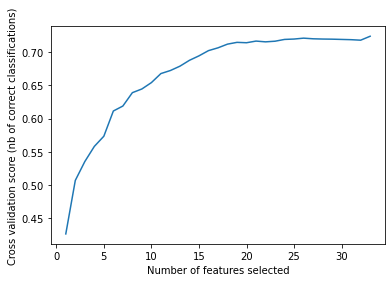

Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUG', 'GUU',
       'GUA', 'GCU', 'GCA', 'CCU', 'UGG', 'GGU', 'GGA', 'GGG', 'AGC', 'ACU',
       'ACC', 'UAC', 'CAA', 'AAC', 'UGU', 'UGC', 'CGU', 'CGC', 'CGA', 'AGG',
       'GAC', 'UAA', 'UAG'],
      dtype='object')


In [69]:
model = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')

pipeline = Pipeline(steps=[('scaler', scaler),('s',rfecv),('m',model)])

pipeline.fit(X_2_nocorr, y_2)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

mask = rfecv.get_support()
features_rfe = train2_nocor.columns[mask]
print(features_rfe)

In [70]:
X_test_nocorr = test[selected_columns]
X_test_nocorr_fs = X_test_nocorr[features_rfe]
X_nocorr_rfe = X_2_df[features_rfe]

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
LogisticRegression
Accuracy: 69.5702%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.81      0.93      0.86       584
           2       0.61      0.35      0.44       269
           3       0.52      0.28      0.37       114
           4       0.33      0.02      0.04        44
           5       0.00      0.00      0.00         4
           6       0.66      0.67      0.67       505
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        43
           9       0.65      0.81      0.72       567
          10       0.69      0.83      0.76       415

    accuracy                           0.70      2606
   macro avg       0.39      0.35      0.35      2606
weighted avg       0.65      0.70      0.66      2606



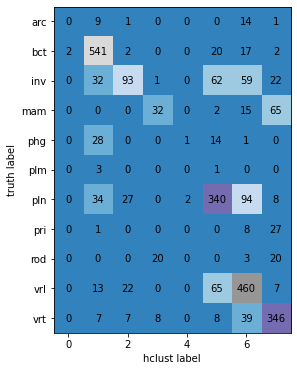

------------------------------------------------------------
SVC
Accuracy: 72.5249%
              precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.81      0.93      0.87       584
           2       0.68      0.36      0.47       269
           3       0.57      0.36      0.44       114
           4       1.00      0.09      0.17        44
           5       0.00      0.00      0.00         4
           6       0.70      0.71      0.70       505
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        43
           9       0.70      0.83      0.76       567
          10       0.71      0.88      0.78       415

    accuracy                           0.73      2606
   macro avg       0.53      0.40      0.42      2606
weighted avg       0.70      0.73      0.70      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


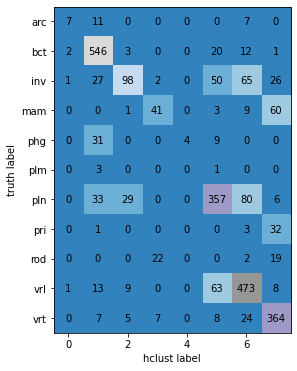

------------------------------------------------------------
SVC
Accuracy: 83.5764%
              precision    recall  f1-score   support

           0       0.48      0.56      0.52        25
           1       0.87      0.95      0.91       584
           2       0.76      0.65      0.70       269
           3       0.67      0.75      0.71       114
           4       0.68      0.59      0.63        44
           5       0.00      0.00      0.00         4
           6       0.86      0.81      0.84       505
           7       0.62      0.42      0.50        36
           8       0.68      0.44      0.54        43
           9       0.86      0.88      0.87       567
          10       0.87      0.90      0.89       415

    accuracy                           0.84      2606
   macro avg       0.67      0.63      0.65      2606
weighted avg       0.83      0.84      0.83      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


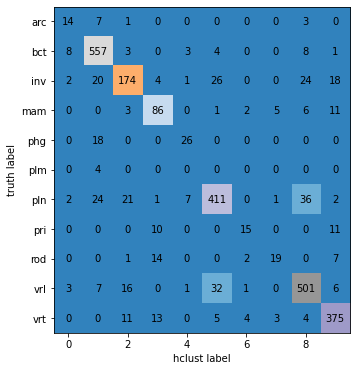

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 76.5925%
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        25
           1       0.78      0.93      0.85       584
           2       0.76      0.44      0.56       269
           3       0.52      0.81      0.63       114
           4       0.76      0.36      0.49        44
           5       0.00      0.00      0.00         4
           6       0.78      0.78      0.78       505
           7       0.38      0.17      0.23        36
           8       0.61      0.26      0.36        43
           9       0.79      0.80      0.80       567
          10       0.84      0.84      0.84       415

    accuracy                           0.77      2606
   macro avg       0.62      0.52      0.54      2606
weighted avg       0.76      0.77      0.75      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


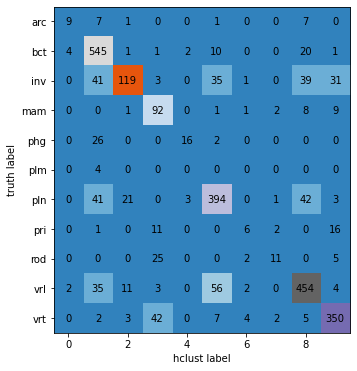

------------------------------------------------------------
KNeighborsClassifier
Accuracy: 81.3507%
              precision    recall  f1-score   support

           0       0.65      0.44      0.52        25
           1       0.83      0.94      0.88       584
           2       0.81      0.51      0.63       269
           3       0.60      0.79      0.68       114
           4       0.71      0.66      0.68        44
           5       0.00      0.00      0.00         4
           6       0.84      0.82      0.83       505
           7       0.31      0.28      0.29        36
           8       0.82      0.42      0.55        43
           9       0.86      0.87      0.86       567
          10       0.84      0.88      0.86       415

    accuracy                           0.81      2606
   macro avg       0.66      0.60      0.62      2606
weighted avg       0.81      0.81      0.81      2606



C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


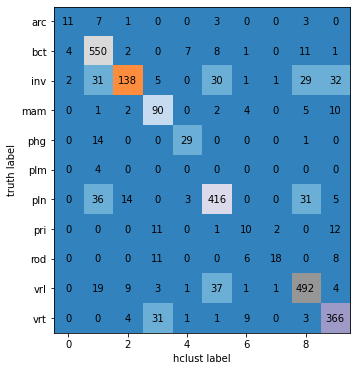

------------------------------------------------------------
LinearDiscriminantAnalysis
Accuracy: 68.8795%
              precision    recall  f1-score   support

           0       0.36      0.56      0.44        25
           1       0.82      0.86      0.84       584
           2       0.53      0.39      0.45       269
           3       0.62      0.60      0.61       114
           4       0.29      0.39      0.33        44
           5       0.00      0.00      0.00         4
           6       0.64      0.66      0.65       505
           7       0.22      0.17      0.19        36
           8       0.65      0.30      0.41        43
           9       0.66      0.77      0.71       567
          10       0.84      0.72      0.77       415

    accuracy                           0.69      2606
   macro avg       0.51      0.49      0.49      2606
weighted avg       0.69      0.69      0.68      2606



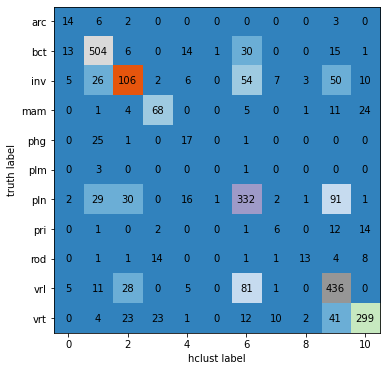

C:\Users\eleon\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\eleon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
QuadraticDiscriminantAnalysis
Accuracy: 75.1343%
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.84      0.90      0.87       584
           2       0.50      0.52      0.51       269
           3       0.62      0.79      0.69       114
           4       0.87      0.61      0.72        44
           5       0.00      0.00      0.00         4
           6       0.79      0.59      0.68       505
           7       0.62      0.42      0.50        36
           8       0.72      0.49      0.58        43
           9       0.70      0.90      0.79       567
          10       0.91      0.79      0.84       415

    accuracy                           0.75      2606
   macro avg       0.69      0.56      0.59      2606
weighted avg       0.76      0.75      0.75      2606



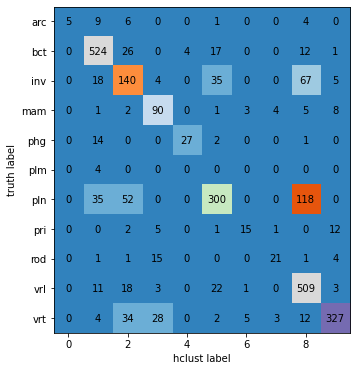

------------------------------------------------------------


In [71]:
no_corr_rfe_class = []
for model in models:
    clf = Pipeline(steps=[('scaler', scaler),('m',model)])
    clf.fit(X_nocorr_rfe, y_2)
    name = model.__class__.__name__
    print("-"*60)
    print(name)
    test_predictions = clf.predict(X_test_nocorr_fs)
    acc = accuracy_score(y_test, test_predictions)
    no_corr_rfe_class.append(acc)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, test_predictions))
    plot_cm(y_test, test_predictions, label_dict)
    plt.show()
    #entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    
print("-"*60)

Models' accuracy lowered compared to RFE.

### Conclusions
The following barplot summarises the test accuracies of the models performed on different subuset of features.

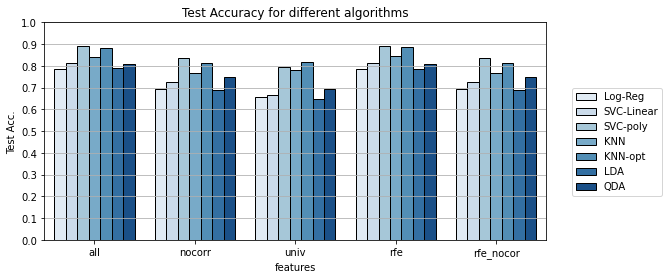

In [72]:
no_corr_class = np.array(no_corr_class).reshape(1,-1)
whole_class = np.array(whole_class).reshape(1,-1)
univ_class = np.array(univ_class).reshape(1,-1)
rfe_class = np.array(rfe_class).reshape(1,-1)
no_corr_rfe_class = np.array(no_corr_rfe_class).reshape(1,-1)

values = np.concatenate((whole_class,no_corr_class,univ_class,rfe_class,no_corr_rfe_class))
names = ['Log-Reg','SVC-Linear','SVC-poly', 'KNN', 'KNN-opt', 'LDA', 'QDA']
rows = ['all', 'nocorr', 'univ', 'rfe', 'rfe_nocor']

df_acc = pd.DataFrame(values, columns=names, index=rows)
df_acc = df_acc.reset_index().rename(columns={'index': 'features'})
df_acc = df_acc.melt(id_vars='features', var_name='model', value_name='acc')

fig, ax = plt.subplots(figsize=(9,4))
ax.yaxis.grid(True)
sns.barplot(x="features", y="acc", hue="model", edgecolor = 'k',
            palette=sns.color_palette("Blues", 7), 
            data=df_acc)
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)
plt.ylim(0, 1)
ax.set_title('Test Accuracy for different algorithms')
ax.set_ylabel('Test Acc.')
ax.set_yticks(np.arange(0,1.1,0.1))
plt.show()

We can see in the above barplot that the best performing models are <b>"all"</b> and <b>"RFE"</b>. <br>
These are a quite bad results as we would expect that through the use of feature selection methods the models would be gradually improved.

<a id='section_5'></a>
# 3. Regression

The 'ACA' and 'AGA' codon frequencies are missing in the test dataset, therefore, we learned a regressor for them from the training dataset. <br>

In the following violin plots, we can see how 'ACA' and 'AGA' codons are distributed in the classes.

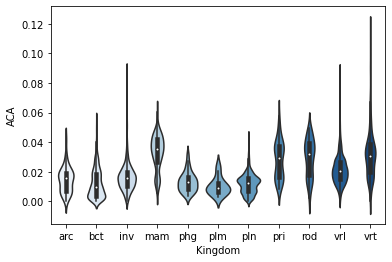

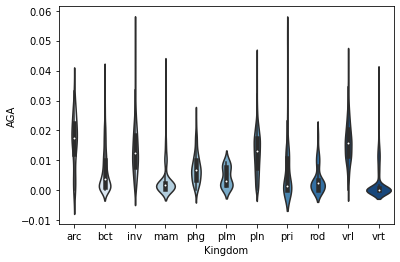

In [73]:
sns.violinplot(x="Kingdom", y="ACA", data=train, palette="Blues")
plt.show()
sns.violinplot(x="Kingdom", y="AGA", data=train, palette="Blues")
plt.show()

Since the test set has no values of 'AGA' and 'ACA' codon frequencies, we had futher splitted the training dataset into a train and test set.

In [75]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV, f_regression

In [76]:
split_seed = 42
split_test_size = 0.3
X_reg = train2
y_reg = train[['ACA', 'AGA']]

X_test_df = np.array(test)
y_test_cat = np.array(test['Kingdom'])

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=split_test_size,random_state=split_seed)
X_train = X_train.drop(['Kingdom'], axis=1)

<h3> Linear regression</h3>

It is a parametric method in which the goal is to find the parameters β which will give us the most accurate estimation of the real underlying relationship between y and the covariates.

With the ordinary least squares algorithm,we find the coefficients that minimiza the residual sum of squares on the training data, which is the sum of the difference between the predicted response yˆ and the actual value y.

### Simple linear regression

In order to assess the godness of the fit, we had considered two measures:
- R2 score
- MSE

In [77]:
# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X_train, y_train)          # 2- model fitting
X_test = X_test.drop(['Kingdom'], axis=1)

y_predict_test = model.predict(X_test)       # 3- prediction
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.866999395515063
Train MSE score  1.3933698248459256e-05
Test R2 score  0.8593904838633281
Test MSE score  1.3701572183503214e-05


In [78]:
y_predict_train

array([[0.00856593, 0.02042578],
       [0.01024403, 0.00976888],
       [0.01461916, 0.01147031],
       ...,
       [0.01706292, 0.01081187],
       [0.01460631, 0.01129128],
       [0.01670731, 0.0190317 ]])

### Polynomial terms

We can have generalized linear models which are linear in the coefficients but can be not linear in the original feature space. 
More simply, instead of using logistic regression, we can perform a polynomial transformation of our features while still using the OLS algorithm to solve the problem and see if we capture better the existing relations.

In [79]:
from sklearn.preprocessing import PolynomialFeatures
# Transform each feature into polynomial features based on the degree.
# Eg: in case of degree 2 we have the original features plus the product
# of each pair of features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train)

# Applies the transformation
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# With degree 2 we have: x1,x2,x3,x1x1,x1x2,x1x3,x2x2,x2x3,x3x3
print("X_train.shape", X_train.shape, " X_poly_train.shape", X_train_poly.shape)
print("X_train.shape", X_test.shape, " X_poly_train.shape", X_test_poly.shape)

X_train.shape (3651, 62)  X_poly_train.shape (3651, 2015)
X_train.shape (1566, 62)  X_poly_train.shape (1566, 2015)


In [80]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import make_scorer, plot_confusion_matrix, accuracy_score

r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)
mse_scorer = make_scorer(mean_squared_error,
                        greater_is_better=False)

In [81]:
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': [2,3]}
              #'linear__fit_intercept': [True, False],
              #'linear__normalize': [True, False]}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=5, n_jobs=-1, verbose=False)
cv.fit(X_train, y_train)
pd.DataFrame(cv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      24.331204      0.896485         0.489482        0.533560   
1     125.737389      8.443463         0.389221        0.122686   

  param_poly__degree               params  split0_test_score  \
0                  2  {'poly__degree': 2}           0.512943   
1                  3  {'poly__degree': 3}           0.420920   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.507812           0.583431           0.344347           0.604790   
1          -0.567080           0.538444           0.283486           0.031553   

   mean_test_score  std_test_score  rank_test_score  
0         0.510665        0.091465                1  
1         0.141465        0.392422                2

Polynomial terms do not improve the R2.

## Feature selection

### Ridge

In [82]:
from sklearn import preprocessing
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('regressor',Ridge())])
alphap=np.linspace(5e-5,0.01,11)
params = {'regressor__alpha': alphap}
cv = GridSearchCV(model, params, refit="MSE", cv=5, 
                  scoring={"R^2": make_scorer(r2_score,greater_is_better=True),
                          "MSE": make_scorer(mean_squared_error,greater_is_better=False)})
cv.fit(X_train, y_train)
resRidge=pd.DataFrame(cv.cv_results_)
resRidge.sort_values(by="rank_test_MSE")[["param_regressor__alpha","mean_test_R^2","std_test_R^2","mean_test_MSE","std_test_MSE","rank_test_R^2","rank_test_MSE"]]

param_regressor__alpha  mean_test_R^2  std_test_R^2  mean_test_MSE  \
10                   0.01       0.857170      0.008344      -0.000015   
9                0.009005       0.857170      0.008344      -0.000015   
8                 0.00801       0.857170      0.008344      -0.000015   
7                0.007015       0.857170      0.008344      -0.000015   
6                 0.00602       0.857170      0.008344      -0.000015   
5                0.005025       0.857169      0.008344      -0.000015   
4                 0.00403       0.857169      0.008343      -0.000015   
3                0.003035       0.857169      0.008343      -0.000015   
2                 0.00204       0.857169      0.008343      -0.000015   
1                0.001045       0.857169      0.008343      -0.000015   
0                   5e-05       0.857169      0.008343      -0.000015   

    std_test_MSE  rank_test_R^2  rank_test_MSE  
10      0.000001              1              1  
9       0.000001              2              2  
8       0.000001              3              3  
7       0.000001              4              4  
6       0.000001              5              5  
5       0.000001              6              6  
4       0.000001              7              7  
3       0.000001              8              8  
2       0.000001              9              9  
1       0.000001             10             10  
0       0.000001             11             11

The R2 score improved comparing with polynomial terms. However, it is still under the simple linear regression R2 score (0.85)

### Lasso

In [ ]:
model = Pipeline([('scaler',preprocessing.StandardScaler()), 
               ('regressor',Lasso())])
alphap=np.linspace(5e-5,0.01,11)
params = {'regressor__alpha': alphap}
cv = GridSearchCV(model, params, refit="MSE", cv=5, 
                  scoring={"R^2": make_scorer(r2_score,greater_is_better=True),
                          "MSE": make_scorer(mean_squared_error,greater_is_better=False)})
cv.fit(X_train, y_train)
resLasso=pd.DataFrame(cv.cv_results_)
resLasso.sort_values(by="rank_test_MSE")[["param_regressor__alpha","mean_test_R^2","std_test_R^2","mean_test_MSE","std_test_MSE","rank_test_R^2","rank_test_MSE"]]

The R2 score is approximately 10% lower than the simple linear regression R2 score.

### Forward feature selection

In [83]:
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score

In [84]:
def general_ff(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      #test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0,plot_results=True, 
               dummyModel = DummyRegressor,mod = LinearRegression,**kwargs):   # estimator and parameters
    #test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    #test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    #subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    if plot_results==True:    
        plt.figure()
        candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = dummyModel()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    if plot_results==True:
        _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    score_3=score
    #_, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    #subsets_test.append(score)
    dim=0
    if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, []))
            print("M{} CV score (2.): {}".format(dim, score_3))
            #print("M{} test score (3.): {}".format(dim, score))
        
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(1,len(all_features)+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = mod(**kwargs)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
        if plot_results==True:
            
            _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        step3_score=score
        #best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        #_, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        #subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            #print("M{} subset score (3.): {}".format(dim, score))
            print("M{} CV score (3.): {}".format(dim, step3_score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    best_score = subsets_metric[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Score step: {}".format(best_score))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    if plot_results==True:
        best_candidate_score_idx = candidates_argbest(best_candidate_metric)
        _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
        _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
        candidate_fig.set_title(candidates_scorer_name)
        candidate_fig.legend()
    
        # Plot a figure to show how te 3. metric evolves
        plt.figure()
        subsets_fig = plt.subplot(111)
        _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
        _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
        #best_test_score_idx = test_argbest(subsets_test)
        #_ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
        #_ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
        #                          marker='X', label="Best test score", color="y")
        subsets_fig.set_title(subsets_scorer_name)
        subsets_fig.legend()
    return(best_features,best_score,subsets_metric)

In [85]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        return model, score
    
    return evaluator

............
Best model (M0) with 0 features: []
M0 CV score (2.): -0.0006797183135113461
............
Best model (M1) with 1 features: ['CUA']
M1 CV score (3.): 0.27998460943241443
............
Best model (M2) with 2 features: ['CUA', 'GGC']
M2 CV score (3.): 0.5083520528088475
............
Best model (M3) with 3 features: ['CUA', 'GGC', 'GCA']
M3 CV score (3.): 0.5548509941084981
............
Best model (M4) with 4 features: ['CUA', 'GGC', 'GCA', 'CGU']
M4 CV score (3.): 0.5861793253368177
............
Best model (M5) with 5 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA']
M5 CV score (3.): 0.6079568357047391
............
Best model (M6) with 6 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG']
M6 CV score (3.): 0.6279527976315116
............
Best model (M7) with 7 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA']
M7 CV score (3.): 0.6501541123460406
............
Best model (M8) with 8 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA', 'UUC']
M8 CV score (3.): 0.66

............
Best model (M38) with 38 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA', 'UUC', 'UCU', 'ACU', 'AUA', 'CUU', 'GCG', 'AAU', 'AUU', 'GGA', 'GGG', 'UCC', 'AUC', 'AGC', 'GCC', 'ACG', 'UCG', 'UAU', 'UGC', 'UUG', 'UUA', 'GAG', 'UAC', 'CAG', 'CCU', 'UGG', 'CCG', 'GUG', 'GAU', 'CUG', 'AAG', 'CGA']
M38 CV score (3.): 0.7418925686681039
............
Best model (M39) with 39 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA', 'UUC', 'UCU', 'ACU', 'AUA', 'CUU', 'GCG', 'AAU', 'AUU', 'GGA', 'GGG', 'UCC', 'AUC', 'AGC', 'GCC', 'ACG', 'UCG', 'UAU', 'UGC', 'UUG', 'UUA', 'GAG', 'UAC', 'CAG', 'CCU', 'UGG', 'CCG', 'GUG', 'GAU', 'CUG', 'AAG', 'CGA', 'CCC']
M39 CV score (3.): 0.7422733137327078
............
Best model (M40) with 40 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA', 'UUC', 'UCU', 'ACU', 'AUA', 'CUU', 'GCG', 'AAU', 'AUU', 'GGA', 'GGG', 'UCC', 'AUC', 'AGC', 'GCC', 'ACG', 'UCG', 'UAU', 'UGC', 'UUG', 'UUA', 'GAG', 'UAC', 'CAG', 'CCU', 'UGG', 'CCG', 'GUG', 

............
Best model (M58) with 58 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA', 'UUC', 'UCU', 'ACU', 'AUA', 'CUU', 'GCG', 'AAU', 'AUU', 'GGA', 'GGG', 'UCC', 'AUC', 'AGC', 'GCC', 'ACG', 'UCG', 'UAU', 'UGC', 'UUG', 'UUA', 'GAG', 'UAC', 'CAG', 'CCU', 'UGG', 'CCG', 'GUG', 'GAU', 'CUG', 'AAG', 'CGA', 'CCC', 'GUA', 'GUU', 'CUC', 'CGC', 'CAA', 'GUC', 'AAA', 'UGA', 'GAC', 'AAC', 'GGU', 'ACC', 'UUU', 'UAA', 'GCU', 'CAU', 'AUG', 'CCA', 'AGU']
M58 CV score (3.): 0.8074209365181673
............
Best model (M59) with 59 features: ['CUA', 'GGC', 'GCA', 'CGU', 'UCA', 'AGG', 'GAA', 'UUC', 'UCU', 'ACU', 'AUA', 'CUU', 'GCG', 'AAU', 'AUU', 'GGA', 'GGG', 'UCC', 'AUC', 'AGC', 'GCC', 'ACG', 'UCG', 'UAU', 'UGC', 'UUG', 'UUA', 'GAG', 'UAC', 'CAG', 'CCU', 'UGG', 'CCG', 'GUG', 'GAU', 'CUG', 'AAG', 'CGA', 'CCC', 'GUA', 'GUU', 'CUC', 'CGC', 'CAA', 'GUC', 'AAA', 'UGA', 'GAC', 'AAC', 'GGU', 'ACC', 'UUU', 'UAA', 'GCU', 'CAU', 'AUG', 'CCA', 'AGU', 'CAC']
M59 CV score (3.): 0.8206538909884802
.......

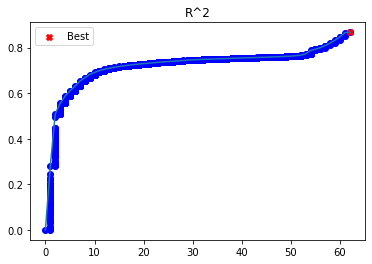

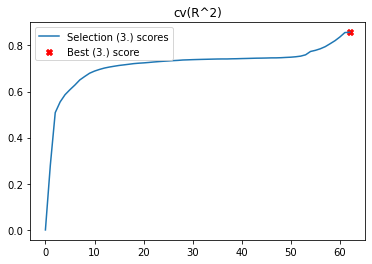

In [86]:
bf_linear,bscore,scores=general_ff(X_train, y_train, 
                            X_test, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  get_cv_evaluator(make_scorer(r2_score), cv=5), np.argmax, # 3.
                  #get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True,
                   dummyModel=DummyRegressor,mod=LinearRegression,fit_intercept=True)

The best results were obtained with 33 features and gave a cv score of 0.844.

For what regards the regression the best result is obtained using a simple linear regression. 

<h3> Conclusions </h3>

Once obtained the two regressors (one for each of the two codons that are missing in the test set) we can use them to predict the possible value of the real "AGA" and "ACA" in the test set. <br>
This could be done by adding their predicted value in a new column of the test dataset, train the model selected as the best classifier during the classification and then test our classifier on the test set to see if the model prediction improves or not. <br>

In general is possible to say that the analyses performed until now did not add important information to those already presented in the paper. <br>
 <br>
Although we have tried to reduce the problem of multidimensionality, firstly trying to reduce the number of samples and then by reducing the number of features, we did not ended up with satisfying results especially for what regards the clustering analysis. <br>
in fact, even if we knew how data are labeled, the clustering algoritmh performed very poorely.<br> 
These poor results might be due to the difficult interpretation of biological data in combination to the high dimensionality of this dataset which togheter made the data very noisy to be properly analyzed (or to show something).